In [ ]:
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d mamta1999/cardiovascular-risk-data
! unzip cardiovascular-risk-data.zip

  0% 0.00/59.3k [00:00<?, ?B/s]
100% 59.3k/59.3k [00:00<00:00, 2.83MB/s]
Archive:  cardiovascular-risk-data.zip
  inflating: data_cardiovascular_risk.csv  


In [ ]:
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 65.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [ ]:
data=pd.read_csv('data_cardiovascular_risk.csv')
data.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [ ]:
data.head()

In [ ]:
# data.shape
# data.columns
data.dtypes
# data.info

In [ ]:
data.describe()

Filling null values

In [ ]:
data.fillna(method='ffill', inplace = True)


In [ ]:
data['glucose'].fillna(method='ffill', inplace = True)
data['education'].fillna(method='ffill', inplace = True)
data['cigsPerDay'].fillna(method='ffill', inplace = True)
data['BPMeds'].fillna(value=0, inplace = True)
data['totChol'].fillna(method='ffill', inplace = True)
data["BMI"].fillna(method='ffill', inplace = True)
data['heartRate'].fillna(method='ffill', inplace = True)

In [ ]:
data.columns[data.isnull().any()]

Index(['BMI'], dtype='object')

In [ ]:
data['BMI'].isna().sum()

1

In [ ]:
data = data.dropna(subset=['BMI'])

In [ ]:
data.dtypes

In [ ]:
data_float=data[['age','cigsPerDay', 'totChol','sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]

In [ ]:
import seaborn as sns
sns.heatmap(data_float)

Feature Visualization

In [ ]:
fig, ax = plt.subplots(4,4, figsize=(14,10))
n_bins=20
ax[0,0].hist(data['age'],n_bins, density=True)
ax[0,1].hist(data['education'],n_bins, density=True)
ax[0,2].hist(data['cigsPerDay'],n_bins, density=True)
ax[0,3].hist(data['BPMeds'],n_bins, density=True)
ax[1,0].hist(data['prevalentStroke'],n_bins, density=True)
ax[1,1].hist(data['prevalentHyp'],n_bins, density=True)
ax[1,2].hist(data['diabetes'],n_bins, density=True)
ax[1,3].hist(data['totChol'],n_bins, density=True)
ax[2,0].hist(data['sysBP'],n_bins, density=True)
ax[2,1].hist(data['diaBP'],n_bins, density=True)
ax[2,2].hist(data['BMI'],n_bins, density=True)
ax[2,3].hist(data['heartRate'],n_bins, density=True)
ax[3,0].hist(data['glucose'],n_bins, density=True)
ax[3,1].hist(data['TenYearCHD'],n_bins, density=True)


In [ ]:
import seaborn as sns
g = sns.PairGrid(data_float)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

Determining Normality

In [ ]:
data_float.columns[0]

'age'

In [ ]:
from scipy.stats.mstats import normaltest #Outputs a p-value. If higher, distribution closer to normal. Mostly p>0.05 suffices
print(normaltest(data_float.age.values))
print(normaltest(data_float.cigsPerDay.values))
print(normaltest(data_float.totChol.values))
print(normaltest(data_float.sysBP.values))
print(normaltest(data_float.diaBP.values))
print(normaltest(data_float.heartRate.values))
print(normaltest(data_float.glucose.values))
#['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate','glucose']


NormaltestResult(statistic=807.6776758970166, pvalue=4.1211754185782805e-176)
NormaltestResult(statistic=605.1786197304963, pvalue=3.864848216416429e-132)
NormaltestResult(statistic=722.3451214216698, pvalue=1.3955643552957373e-157)
NormaltestResult(statistic=702.5532942840395, pvalue=2.770068602309419e-153)
NormaltestResult(statistic=330.780247605462, pvalue=1.485873615940236e-72)
NormaltestResult(statistic=281.24403630668417, pvalue=8.4846412075039e-62)
NormaltestResult(statistic=4063.6504773773204, pvalue=0.0)


Feature encode

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['sex'] = le.fit_transform(data.sex) #1=Female
data['is_smoking'] = le.fit_transform(data.is_smoking) #0=YES
data.head()

id  age  education  sex  is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
1   1   36        4.0    1           0         0.0     0.0                0   
2   2   46        1.0    0           1        10.0     0.0                0   
3   3   50        1.0    1           1        20.0     0.0                0   
4   4   64        1.0    0           1        30.0     0.0                0   
5   5   61        3.0    0           0         0.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   
5             1         0    272.0  182.0  121.0  32.80       85.0     65.0   

   TenYearCHD  
1           0  
2           0  
3           1  
4           0  
5           1

In [ ]:
# data_onehot = pd.get_dummies(data, columns = ['sex'])
# data_onehot = pd.get_dummies(data, columns = ['is_smoking'])
# data_onehot.head()

Feature correlation

In [ ]:
feature_num_corr= data.corr()['TenYearCHD']
best_corr=feature_num_corr[abs(feature_num_corr)>-15].sort_values(ascending=False)
print("There is {} strongly correlated values with diagnosis:\n{}".format(len(best_corr), best_corr))

There is 17 strongly correlated values with diagnosis:
TenYearCHD         1.000000
age                0.224028
sysBP              0.212411
prevalentHyp       0.167170
diaBP              0.135969
glucose            0.123940
diabetes           0.103881
totChol            0.095261
BPMeds             0.087545
sex                0.085339
cigsPerDay         0.069578
prevalentStroke    0.068741
BMI                0.064750
is_smoking         0.033472
heartRate          0.019542
id                 0.011093
education         -0.050659
Name: TenYearCHD, dtype: float64


In [ ]:
### BEGIN SOLUTION
# Calculate the correlation values
feature_cols = data.columns[:-1]                  #Does not work for one hot
corr_values = data[feature_cols].corr()

# Simplify by emptying all the data below the diagonal
tril_index = np.tril_indices_from(corr_values)

# Make the unused values NaNs
for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.NaN

# Stack the data and convert to a data frame
corr_values = (corr_values
               .stack()
               .to_frame()
               .reset_index()
               .rename(columns={'level_0':'feature1',
                                'level_1':'feature2',
                                0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()

A histogram of the absolute value correlations.

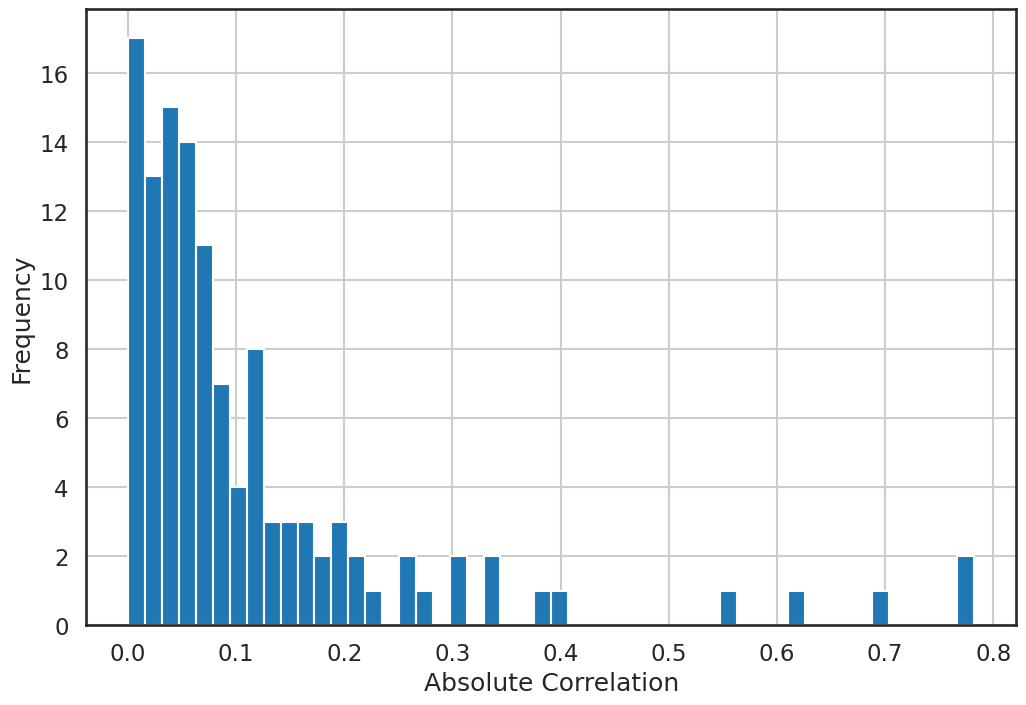

In [ ]:
sns.set_context('talk')
sns.set_style('white')

ax = corr_values.abs_correlation.hist(bins=50, figsize=(12, 8))
ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

In [ ]:
# The most highly correlated values
corr_values.sort_values('correlation', ascending=False).query('abs_correlation>0.5')
### END SOLUTION

feature1    feature2  correlation  abs_correlation
110         sysBP       diaBP     0.781930         0.781930
54     is_smoking  cigsPerDay     0.766559         0.766559
94   prevalentHyp       sysBP     0.699520         0.699520
95   prevalentHyp       diaBP     0.612977         0.612977
104      diabetes     glucose     0.559423         0.559423

Feature skew transformation

In [ ]:
for columns in data.columns:
  print("Skewness of: %f" % data[columns].skew(), "Column: %s" % columns)

Skewness of: 0.000000 Column: id
Skewness of: 0.226129 Column: age
Skewness of: 0.694381 Column: education
Skewness of: 0.271089 Column: sex
Skewness of: 0.010037 Column: is_smoking
Skewness of: 1.224462 Column: cigsPerDay
Skewness of: 5.563074 Column: BPMeds
Skewness of: 12.295764 Column: prevalentStroke
Skewness of: 0.794725 Column: prevalentHyp
Skewness of: 6.001020 Column: diabetes
Skewness of: 0.931706 Column: totChol
Skewness of: 1.176426 Column: sysBP
Skewness of: 0.718231 Column: diaBP
Skewness of: 1.021087 Column: BMI
Skewness of: 0.677307 Column: heartRate
Skewness of: 6.339396 Column: glucose
Skewness of: 1.955922 Column: TenYearCHD


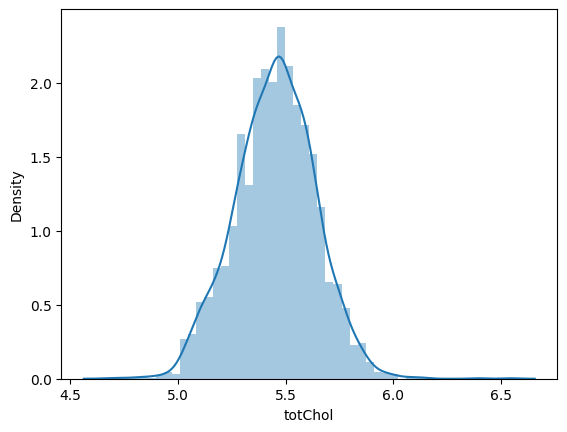

In [ ]:
concavity_log=np.log(data['totChol'])
sp_log = sns.distplot(concavity_log)
concavity_log.skew()
#totChol_log=-0.009
data['totChol_log']=concavity_log

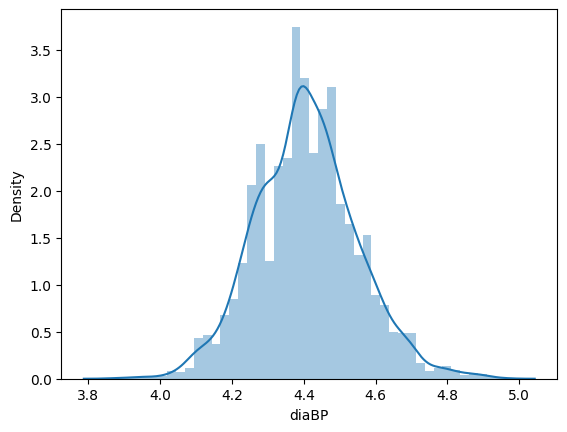

In [ ]:
concavity_log=np.log(data['diaBP'])
sp_log = sns.distplot(concavity_log)
concavity_log.skew()
#skew=-0.18
data['diaBP_log']=concavity_log

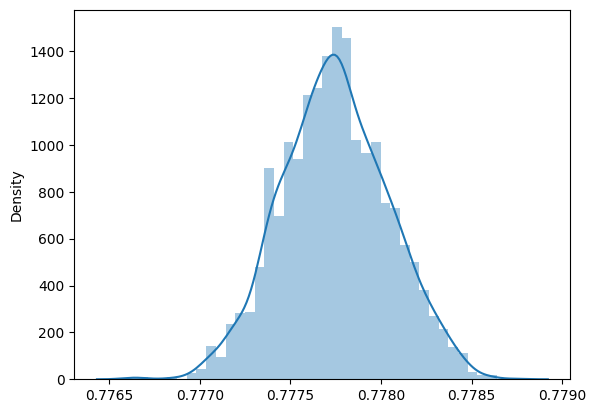

In [ ]:
from scipy.stats import norm
from scipy import stats
#skew now=0.009
concavity_boxcox=stats.boxcox(data['sysBP'])[0]
sp_boxcox = sns.distplot(concavity_boxcox)
pd.Series(concavity_boxcox).skew()
data['sysBP_boxcox']=concavity_boxcox

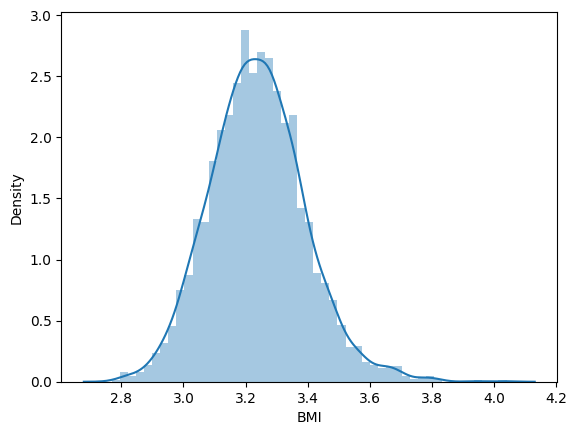

In [ ]:
concavity_log=np.log(data['BMI'])
sp_log = sns.distplot(concavity_log)
concavity_log.skew()
#skew=-0.34
data['BMI_log']=concavity_log

In [ ]:
from scipy.stats import boxcox
transformed_data, best_lambda = boxcox(data.glucose)
data['glucose_new']=transformed_data
print(type(transformed_data))

<class 'numpy.ndarray'>


-0.1982664933692065

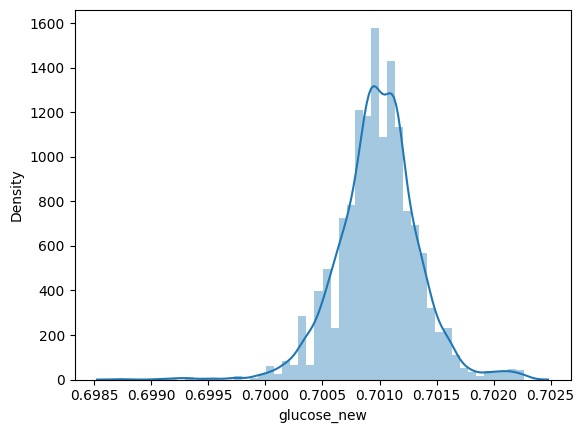

In [ ]:
concavity_log=data['glucose_new']
sp_log = sns.distplot(concavity_log)
concavity_log.skew()
#skew=-0.19

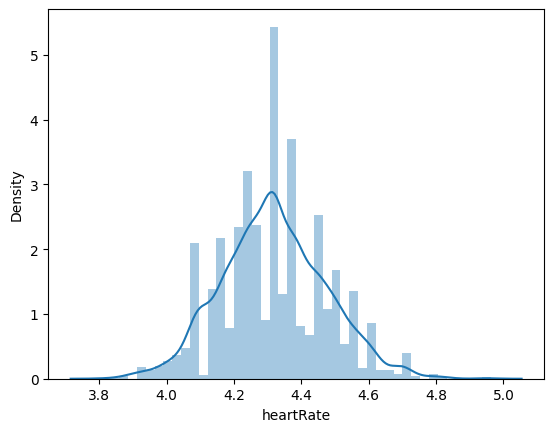

In [ ]:
concavity_log=np.log(data['heartRate'])
sp_log = sns.distplot(concavity_log)
concavity_log.skew()
#skew=-0.15
data['heartRate_log']=concavity_log

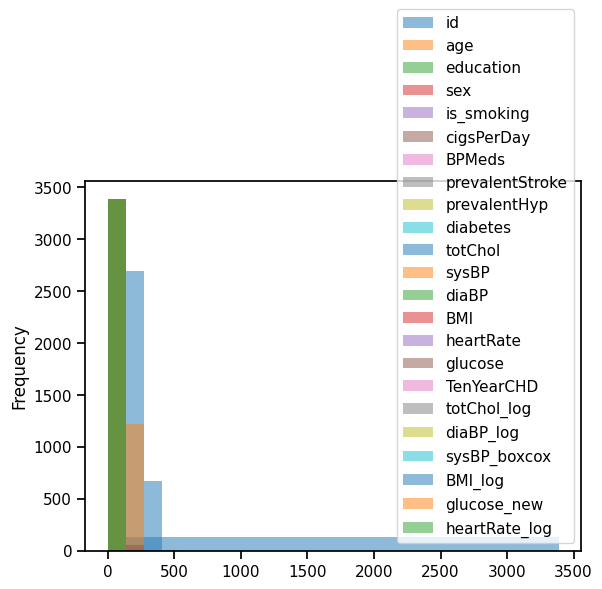

In [ ]:
import seaborn as sns
sns.set_context('notebook')
# df=data.drop(['id', 'Unnamed: 32'], axis=1)
ax = data.plot.hist(bins=25, alpha=0.5)

In [ ]:
data.columns[data.isnull().any()]

Index([], dtype='object')

In [ ]:
non_transformed_columns=['totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
data.drop(columns=non_transformed_columns, inplace=True)

In [ ]:
data.head()

id  age  education  sex  is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
1   1   36        4.0    1           0         0.0     0.0                0   
2   2   46        1.0    0           1        10.0     0.0                0   
3   3   50        1.0    1           1        20.0     0.0                0   
4   4   64        1.0    0           1        30.0     0.0                0   
5   5   61        3.0    0           0         0.0     0.0                0   

   prevalentHyp  diabetes  TenYearCHD  totChol_log  diaBP_log  sysBP_boxcox  \
1             1         0           0     5.356586   4.584967      0.778186   
2             0         0           0     5.521461   4.262680      0.777525   
3             1         0           1     5.451038   4.477337      0.778097   
4             0         0           0     5.484797   4.442651      0.777854   
5             1         0           1     5.605802   4.795791      0.778292   

    BMI_log  glucose_new  heartRate_log  
1  3.393501     0.700907       4.276666  
2  3.013081     0.701321       4.477337  
3  3.341447     0.701321       4.219508  
4  3.274121     0.700963       4.248495  
5  3.490429     0.700568       4.442651

In [ ]:
from scipy import stats
z= np.abs(stats.zscore(data))
threshold=5
print(np.where(z>threshold))
data=data[(z<5)]

(array([  28,   37,   37,   53,   76,   85,  103,  106,  129,  133,  162,
        172,  172,  189,  203,  211,  216,  229,  231,  244,  286,  311,
        323,  324,  356,  382,  399,  422,  422,  454,  474,  475,  480,
        511,  526,  533,  553,  558,  579,  583,  593,  596,  607,  609,
        615,  679,  692,  753,  780,  780,  785,  794,  797,  804,  824,
        828,  900,  957,  958,  969,  992,  995,  999, 1018, 1018, 1031,
       1031, 1045, 1072, 1073, 1133, 1137, 1149, 1154, 1155, 1187, 1196,
       1199, 1206, 1208, 1224, 1224, 1227, 1229, 1229, 1231, 1238, 1273,
       1280, 1283, 1297, 1314, 1366, 1371, 1377, 1385, 1386, 1439, 1447,
       1447, 1558, 1577, 1586, 1602, 1609, 1618, 1621, 1636, 1679, 1688,
       1692, 1712, 1714, 1726, 1759, 1765, 1777, 1777, 1782, 1818, 1818,
       1825, 1856, 1861, 1867, 1874, 1895, 1937, 1946, 1968, 1976, 1992,
       1999, 2028, 2028, 2067, 2079, 2095, 2148, 2153, 2163, 2163, 2175,
       2186, 2187, 2187, 2230, 2236, 2261, 2274, 2

In [ ]:
data.isna().sum()

id                   0
age                  0
education            0
sex                  0
is_smoking           0
cigsPerDay           1
BPMeds             100
prevalentStroke     22
prevalentHyp         0
diabetes            87
TenYearCHD           0
totChol_log          2
diaBP_log            0
sysBP_boxcox         0
BMI_log              1
glucose_new          4
heartRate_log        0
dtype: int64

In [ ]:
data.fillna(method='ffill', inplace = True)

<Axes: >

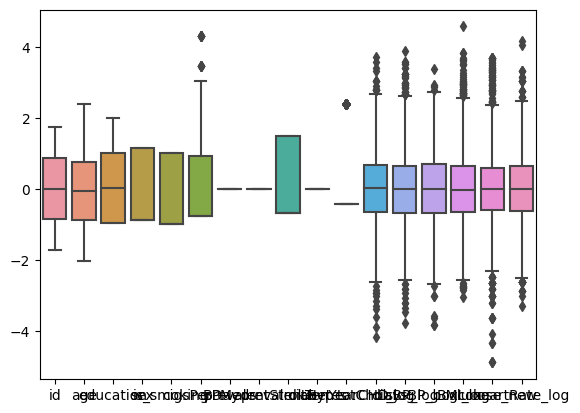

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_df = pd.DataFrame(scaled_data, columns=data.columns)
sns.boxplot(scaled_df)

In [ ]:
# from sklearn.preprocessing import RobustScaler

# scaler = RobustScaler()
# scaled_data = scaler.fit_transform(data)
# scaled_df = pd.DataFrame(scaled_data, columns=data.columns)
# sns.boxplot(scaled_df)

In [ ]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# scaled_data = scaler.fit_transform(data)
# scaled_df = pd.DataFrame(scaled_data, columns=data.columns)
# sns.boxplot(scaled_df)

In [ ]:
data= scaled_df

In [ ]:
import seaborn as sns
sns.set_context('notebook')
# df=data.drop(['id', 'Unnamed: 32'], axis=1)
ax = data.plot.hist(bins=25, alpha=0.5)

In [ ]:
num = data.select_dtypes(include = ['int64', 'float64'])
plt.figure(figsize = (30, 25))
sns.heatmap(num.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [ ]:
data.columns

In [ ]:
data.head()

###Exploring K-Means Clustering

In [ ]:
# Setup and imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.utils import shuffle

# Sets backend to render higher res images
%config InlineBackend.figure_formats = ['retina']

In [ ]:
plt.rcParams['figure.figsize'] = [6,6]
sns.set_style("whitegrid")
sns.set_context("talk")

Cluster Starting Points

In [ ]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'
    alpha = 0.5
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

In [ ]:
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
display_cluster(X)

Clustering with a random state of 10:


In [ ]:
num_clusters = 2
km = KMeans(n_clusters=num_clusters,random_state=10,n_init=1) # n_init, number of times the K-mean algorithm will run
km.fit(X)
display_cluster(X,km,num_clusters)

Clustering with a random state of 20:


In [ ]:
num_clusters = 2
km = KMeans(n_clusters=num_clusters,random_state=20,n_init=1) # n_init, number of times the K-mean algorithm will run
km.fit(X)
display_cluster(X,km,num_clusters)

#It's because the starting points of the cluster centers have an impact on where the final clusters lie.  The starting point of the clusters is controlled by the random state.

Determining optimium number of clusters

In [ ]:
n_samples = 1000
n_bins = 4
centers = [(-3, -3), (0, 0), (3, 3), (6, 6)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
display_cluster(X)

Running K-means with different no. of clusters

In [ ]:
num_clusters = 7
km = KMeans(n_clusters=num_clusters)
km.fit(X)
display_cluster(X,km,num_clusters)

In [ ]:
km.inertia_

In [ ]:
num_clusters = 4
km = KMeans(n_clusters=num_clusters)
km.fit(X)
display_cluster(X,km,num_clusters)

In [ ]:
km.inertia_

Code that calculates the inertia for 1 to 10 clusters, and plot the inertia as a function of the number of clusters


In [ ]:
#Elbow Method
inertia = []
list_num_clusters = list(range(1,11))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(X)
    inertia.append(km.inertia_)

plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');

###Applying K-Means Clustering

In [ ]:
data.columns[data.isnull().any()]

Index([], dtype='object')

In [ ]:
data.columns

In [ ]:
km = KMeans(n_clusters=5, random_state=42)
km.fit(data)

KMeans(n_clusters=5, random_state=42)

In [ ]:
data.rename(columns = {'totChol_log':'totChol', 'diaBP_log': 'diaBP', 'sysBP_boxcox':'sysBP', 'BMI_log':'BMI', 'glucose_new':'glucose', 'heartRate_log':'heartRate'}, inplace = True)

In [ ]:
data.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD', 'totChol',
       'diaBP', 'sysBP', 'BMI', 'glucose', 'heartRate'],
      dtype='object')

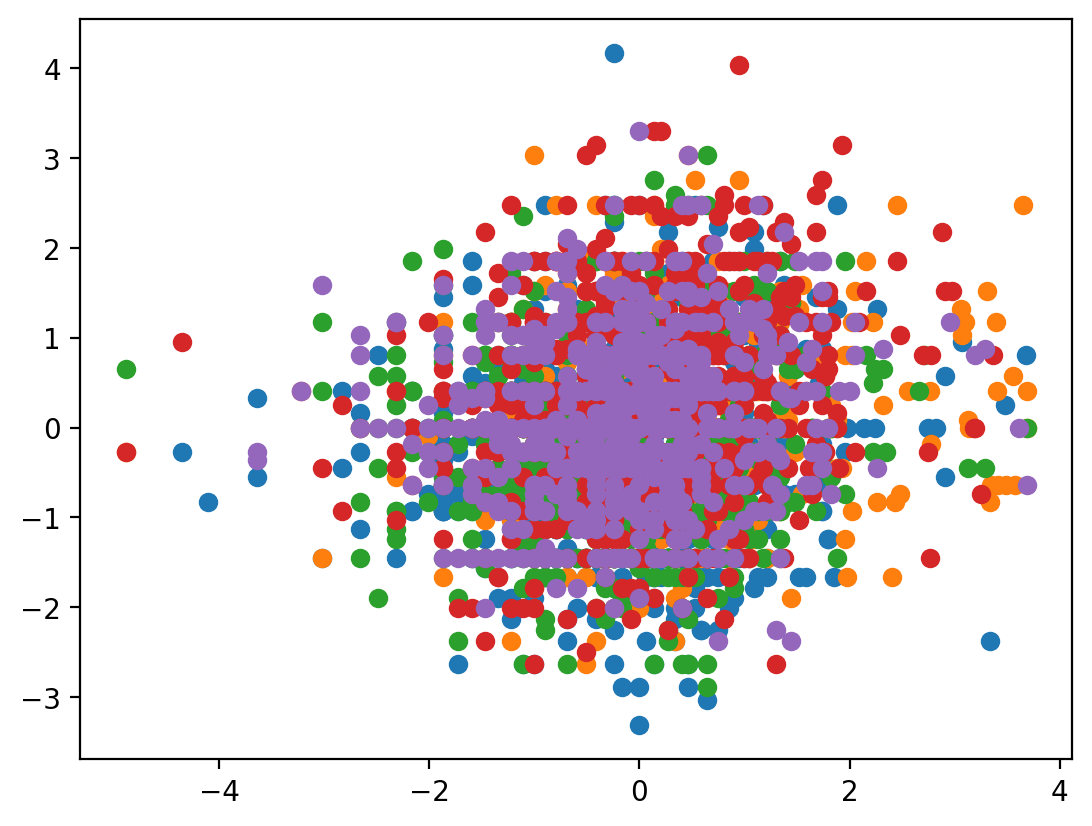

In [ ]:
for label in np.unique(km.labels_):
    data_ = data[label == km.labels_]
    plt.scatter(data_['glucose'], data_['heartRate'], label=label)
plt.show()

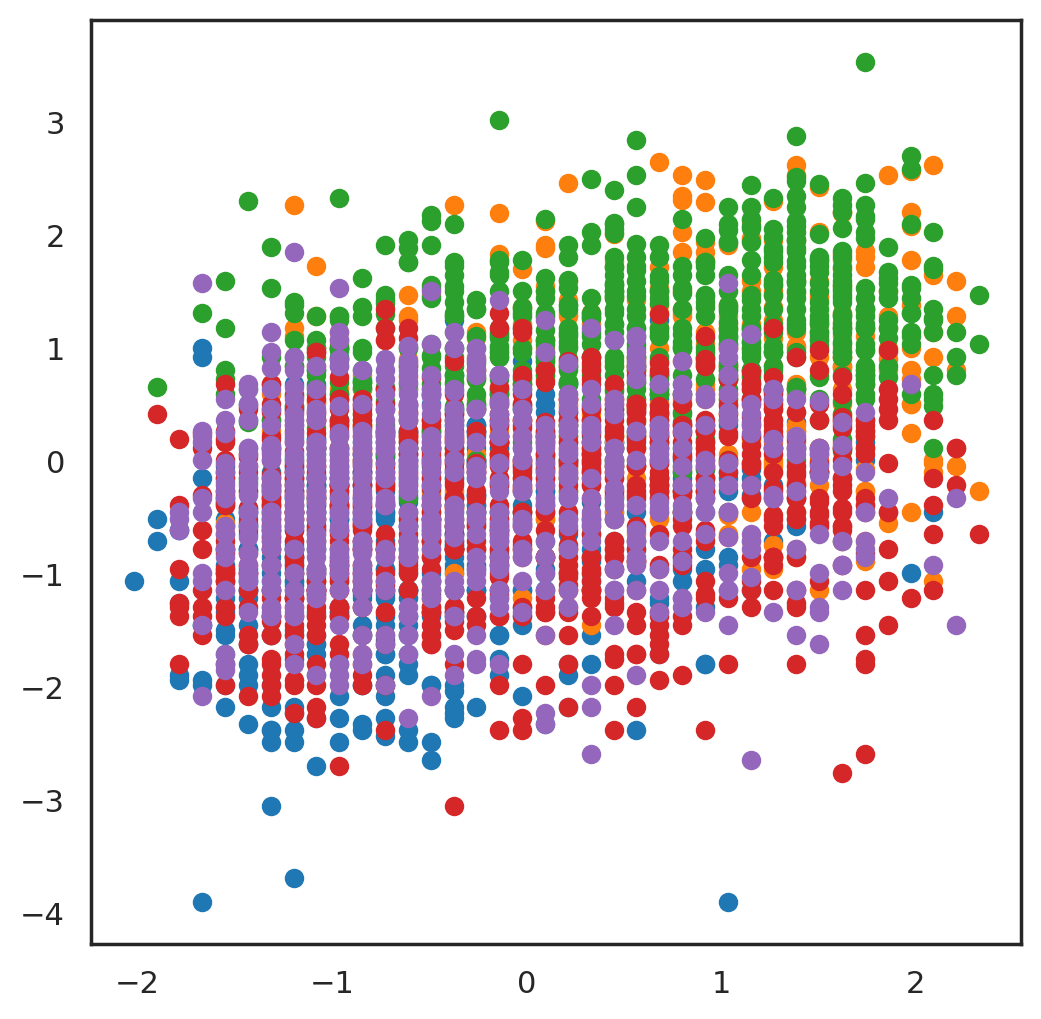

In [ ]:
for label in np.unique(km.labels_):
    data_ = data[label == km.labels_]
    plt.scatter(data_['age'], data_['sysBP_boxcox'], label=label)
plt.show()

###Gaussian Mixture Model

In [ ]:
from sklearn.mixture import GaussianMixture
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from scipy.stats import multivariate_normal
from itertools import chain
from matplotlib.patches import Ellipse


sns.set_context('notebook')
sns.set_style('white')

In [ ]:
def draw_ellipse(position, covariance, ax=None, **kwargs):

    """
    Draw an ellipse with a given position and covariance

    """
    ax = ax or plt.gca()

    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)

    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle, **kwargs))

def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')

    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)


Gaussian Mixture Models (GMM) is a clustering algorithm that:

- Fits a weighted combination of Gaussian distributions to your data
- The data scientist (you) needs to determine the number of gaussian distributions (`k`)


<p style='color: blue'>Hard vs Soft Clustering:</p>

- __Hard clustering__ algorithms assign each data point to exactly one cluster.
- __Soft clustering__ algorithms return probabilities of each data point belonging to all `k` clusters

_GMM is a soft clustering algorithm._


In [ ]:
# since we generated a mixture dataset X4 with 3 Gaussians, it makes sense to set n_components = 3.
gm = GaussianMixture(n_components=3, random_state=0).fit(data)
print("Means of the 3 Gaussians fitted by GMM are\n")
print(gm.means_)

Means of the 3 Gaussians fitted by GMM are

[[ 0.01899746  0.45567312 -0.11448854  0.00426847 -0.17552854 -0.11828583
   0.          0.          1.47317771  0.          0.24627133  0.22591834
   0.88545655  1.00649905  0.43140631  0.11217612  0.21704712]
 [-0.01113401 -0.35387329  0.06003642  0.16782862  1.00502887  0.75788758
   0.          0.         -0.67880473  0.         -0.05783609 -0.13249894
  -0.47280697 -0.52754538 -0.33747667 -0.0893499  -0.02603346]
 [-0.00598231 -0.04242603  0.044275   -0.19963911 -0.99499629 -0.76436207
   0.          0.         -0.67880473  0.         -0.17825058 -0.07103361
  -0.33254659 -0.38952505 -0.03731573 -0.00784291 -0.1861321 ]]


In [ ]:
print("Covariances of the 3 Gaussians fitted by GMM are")
gm.covariances_

Covariances of the 3 Gaussians fitted by GMM are


array([[[ 1.02398587e+00,  4.36386782e-02, -2.88169130e-02,
         -3.44920446e-03,  7.26423828e-03,  1.04716999e-02,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  5.56214945e-02, -4.06943422e-03,
          2.13076401e-02,  4.03981655e-02,  1.06812906e-02,
          1.66849282e-02,  1.96084245e-02],
        [ 4.36386782e-02,  9.07013079e-01, -1.96111165e-01,
         -2.42031029e-01, -2.18017255e-01, -2.46080724e-01,
          0.00000000e+00,  0.00000000e+00,  3.24694853e-31,
          0.00000000e+00,  2.23206734e-01,  1.16097704e-01,
         -2.13910467e-02,  2.24378143e-01, -6.43092575e-02,
          1.16935624e-01, -4.88138849e-02],
        [-2.88169130e-02, -1.96111165e-01,  9.55348066e-01,
          8.60087264e-02,  3.39801225e-02,  3.85378579e-02,
          0.00000000e+00,  0.00000000e+00,  1.63823312e-31,
          0.00000000e+00, -4.37133735e-02,  4.51856904e-02,
          3.98329033e-02, -7.41627607e-02, -7.58691232e-02,
         -6.

In [ ]:
# plot_gmm(GaussianMixture(n_components=3, random_state=0), # the model,
#           data) # simulated Gaussian mixture data
plot_gmm(gm,data)

###Distance Dimensionality

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier

Decision Tree Classifier

In [ ]:
y_col = "TenYearCHD"

X = data.drop(y_col, axis=1)
y = data[y_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:
#Have to classify into groups here

In [ ]:
DT =  DecisionTreeClassifier()
DT.fit(X_train, y_train)
score = DT.score(X_test, y_test)

ValueError: ignored

In [ ]:
print("Score from feature classifier: ", score)

Score from feature classifier:  0.45


Comparing accuracy of classification against number of features

In [ ]:
scores = []

increment, max_features = 50, 4000

for num in np.linspace(increment, max_features, increment, dtype='float64'):

    X, y = make_classification(n_features=num, n_redundant=0,
                               random_state=1, n_clusters_per_class=1, n_classes = 3)

    X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=.4, random_state=42)


    DT =  DecisionTreeClassifier()
    DT.fit(X_train, y_train)
    scores.append( DT.score(X_test, y_test) )


In [ ]:
plt.plot(np.linspace(increment, max_features, increment, dtype='int'),scores)
plt.title("Accuracy of Classification with Increasing Features")
plt.xlabel("Number of features")
plt.ylabel("Classification accuracy");

#### DBSCAN

In [ ]:
import string
import scipy
from scipy.spatial.distance import euclidean, cityblock, cosine
import sklearn.metrics.pairwise

from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits

import seaborn as sns

sns.set_context('notebook')
sns.set_style('white')

# Import matplotlib for 3d plotting:
import matplotlib.pyplot as plt

In [ ]:
cluster = DBSCAN(eps=3, min_samples=4)
cluster.fit(data)
print(f'DBSCAN found {len(set(cluster.labels_) - set([-1]))} clusters and {(cluster.labels_ == -1).sum()} points of noise.')

DBSCAN found 1 clusters and 52 points of noise.


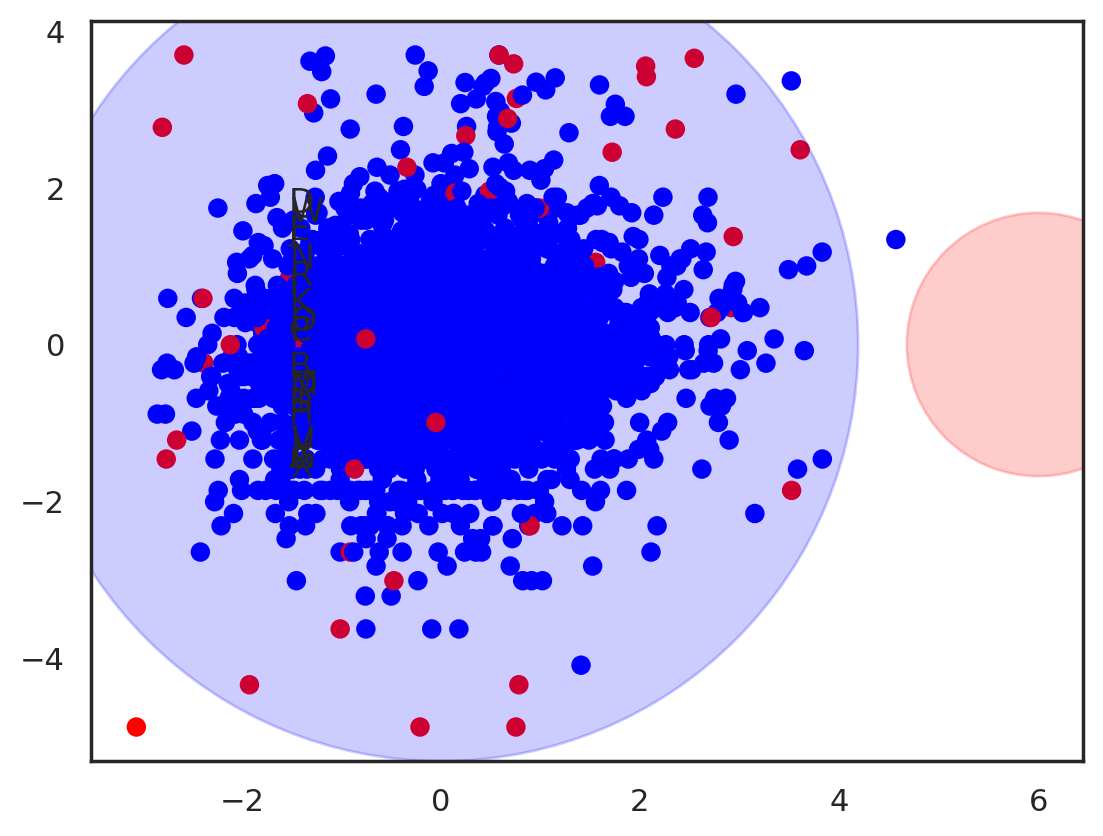

In [ ]:
plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize']
plt.scatter(data['BMI'], data['glucose'], c=[['blue', 'red'][l] for l in cluster.labels_])
plt.scatter(0, 0, c='blue', alpha=0.2, s=90000)
plt.scatter(6, 0, c='red', alpha=0.2, s=9000)
for t, p in zip(string.ascii_uppercase, data.iterrows()):
    plt.annotate(t, (p[1][0] + 0.2, p[1][1]))
plt.show()

###Mean Shift Clustering

In [ ]:
import cv2 as cv
from sklearn.cluster import MeanShift, estimate_bandwidth
from mpl_toolkits import mplot3d
import math

In [ ]:
bandwidth = estimate_bandwidth(data)
ms = MeanShift(bandwidth=bandwidth , bin_seeding=True)
ms.fit(data)
data['cluster']=ms.labels_

###Matrix

In [ ]:
from sklearn.decomposition import PCA
from sympy import Matrix, init_printing,Symbol
from numpy.linalg import qr,eig,inv,matrix_rank,inv, norm
from scipy.linalg import null_space
init_printing()

In [ ]:
def plot_2d(dict_):
    for key, value in dict_.items():
        if value.shape[0]>2:
            plt.scatter(value[:, 0], value[:, 1],label=key)
        else:
            print(value)
            plt.quiver([0],[0],value[:,0],value[:,1],label=key)

    plt.legend()
    plt.show()

###PCA

In [ ]:
from tqdm import tqdm
import numpy as np
import pandas as pd
from itertools import accumulate

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from scipy.stats import loguniform

warnings.filterwarnings('ignore')

sns.set_context('notebook')
sns.set_style('white')

In [ ]:
def plot_explained_variance(pca):
    # This function graphs the accumulated explained variance ratio for a fitted PCA object.
    acc = [*accumulate(pca.explained_variance_ratio_)]
    fig, ax = plt.subplots(1, figsize=(50, 20))
    ax.stackplot(range(pca.n_components_), acc)
    ax.scatter(range(pca.n_components_), acc, color='black')
    ax.set_ylim(0, 1)
    ax.set_xlim(0, pca.n_components_-1)
    ax.tick_params(axis='both', labelsize=36)
    ax.set_xlabel('N Components', fontsize=48)
    ax.set_ylabel('Accumulated explained variance', fontsize=48)
    plt.tight_layout()
    plt.show()

In [ ]:
data.columns

Index(['id (scaled)', 'age (scaled)', 'education (scaled)', 'sex (scaled)',
       'is_smoking (scaled)', 'cigsPerDay (scaled)', 'BPMeds (scaled)',
       'prevalentStroke (scaled)', 'prevalentHyp (scaled)',
       'diabetes (scaled)', 'TenYearCHD (scaled)', 'totChol (scaled)',
       'diaBP (scaled)', 'sysBP (scaled)', 'BMI (scaled)', 'glucose (scaled)',
       'heartRate (scaled)', 'cluster (scaled)'],
      dtype='object')

ValueError: ignored

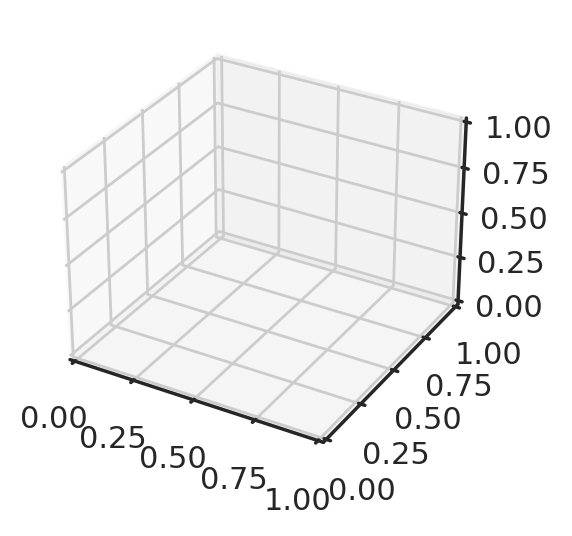

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(121, projection='3d')
xs, ys, zs = [data[TenYearCHD] for TenYearCHD in data.columns]
ax1.scatter(xs, ys, zs)

ax2 = fig.add_subplot(122, projection='3d')
xs, ys, zs = [data[TenYearCHD] for TenYearCHD in data.columns]
ax2.view_init(elev=10, azim=-10)
ax2.scatter(xs, ys, zs)

plt.tight_layout()
plt.show()

Applying PCA

In [ ]:
pca = PCA()
pca.fit(data)

PCA()

In [ ]:
Xhat = pca.transform(data)
Xhat.shape

(3389, 18)

In [ ]:
data_PCA = pd.DataFrame(columns=[f'Projection on Component {i+1}' for i in range(len(data.columns))], data=Xhat)
data_PCA.head()

Projection on Component 1  Projection on Component 2  \
0                   1.547343                   0.046251   
1                  -1.559538                  -0.070002   
2                   1.711256                   2.419251   
3                   0.090115                   1.139688   
4                   4.404165                   0.119579   

   Projection on Component 3  Projection on Component 4  \
0                  -2.982741                  -1.447096   
1                   0.884866                   2.091962   
2                   1.182222                  -1.078022   
3                   1.132650                   0.290171   
4                  -0.234317                  -0.330618   

   Projection on Component 5  Projection on Component 6  \
0                   1.770587                  -1.340697   
1                   0.878254                   0.249955   
2                   0.588804                  -0.654726   
3                   1.112447                   1.301555   
4                   2.464296                   0.040105   

   Projection on Component 7  Projection on Component 8  \
0                   0.533610                  -0.071324   
1                   1.785275                  -0.137932   
2                   1.948308                   0.751951   
3                   1.389171                  -0.437299   
4                  -0.146764                   0.950040   

   Projection on Component 9  Projection on Component 10  \
0                   0.490579                    0.074311   
1                  -0.442114                   -0.130934   
2                   0.397110                    0.916529   
3                  -1.007516                    0.474931   
4                   2.059576                    0.622163   

   Projection on Component 11  Projection on Component 12  \
0                   -0.606460                   -0.475134   
1                   -0.467450                   -0.152023   
2                   -0.446104                   -0.691643   
3                    1.518574                    1.040331   
4                    0.622127                    0.713522   

   Projection on Component 13  Projection on Component 14  \
0                    0.021930                    0.650801   
1                   -0.501317                    0.104555   
2                   -0.190741                    0.363812   
3                    0.626225                   -0.182861   
4                   -0.045187                   -0.543115   

   Projection on Component 15  Projection on Component 16  \
0                2.715266e-16                5.571323e-17   
1               -3.319201e-17                2.245461e-17   
2                1.491634e-16                8.552057e-17   
3               -2.805534e-16               -1.117703e-16   
4               -7.921553e-17                5.391562e-17   

   Projection on Component 17  Projection on Component 18  
0               -8.227530e-17                         0.0  
1                9.724708e-17                         0.0  
2                1.290228e-16                         0.0  
3               -1.056558e-16                         0.0  
4                3.436511e-16                         0.0

In [ ]:
data_PCA.corr().style.background_gradient(cmap='coolwarm')

In [ ]:
data_PCA.drop('Projection on Component 18', axis=1, inplace=True)
data_PCA.head()

Projection on Component 1  Projection on Component 2  \
0                   1.547343                   0.046251   
1                  -1.559538                  -0.070002   
2                   1.711256                   2.419251   
3                   0.090115                   1.139688   
4                   4.404165                   0.119579   

   Projection on Component 3  Projection on Component 4  \
0                  -2.982741                  -1.447096   
1                   0.884866                   2.091962   
2                   1.182222                  -1.078022   
3                   1.132650                   0.290171   
4                  -0.234317                  -0.330618   

   Projection on Component 5  Projection on Component 6  \
0                   1.770587                  -1.340697   
1                   0.878254                   0.249955   
2                   0.588804                  -0.654726   
3                   1.112447                   1.301555   
4                   2.464296                   0.040105   

   Projection on Component 7  Projection on Component 8  \
0                   0.533610                  -0.071324   
1                   1.785275                  -0.137932   
2                   1.948308                   0.751951   
3                   1.389171                  -0.437299   
4                  -0.146764                   0.950040   

   Projection on Component 9  Projection on Component 10  \
0                   0.490579                    0.074311   
1                  -0.442114                   -0.130934   
2                   0.397110                    0.916529   
3                  -1.007516                    0.474931   
4                   2.059576                    0.622163   

   Projection on Component 11  Projection on Component 12  \
0                   -0.606460                   -0.475134   
1                   -0.467450                   -0.152023   
2                   -0.446104                   -0.691643   
3                    1.518574                    1.040331   
4                    0.622127                    0.713522   

   Projection on Component 13  Projection on Component 14  \
0                    0.021930                    0.650801   
1                   -0.501317                    0.104555   
2                   -0.190741                    0.363812   
3                    0.626225                   -0.182861   
4                   -0.045187                   -0.543115   

   Projection on Component 15  Projection on Component 16  \
0                2.715266e-16                5.571323e-17   
1               -3.319201e-17                2.245461e-17   
2                1.491634e-16                8.552057e-17   
3               -2.805534e-16               -1.117703e-16   
4               -7.921553e-17                5.391562e-17   

   Projection on Component 17  
0               -8.227530e-17  
1                9.724708e-17  
2                1.290228e-16  
3               -1.056558e-16  
4                3.436511e-16

In [ ]:
def plot_explained_variance(pca):
    # This function graphs the accumulated explained variance ratio for a fitted PCA object.
    acc = [*accumulate(pca.explained_variance_ratio_)]
    fig, ax = plt.subplots(1, figsize=(50, 20))
    ax.stackplot(range(pca.n_components_), acc)
    ax.scatter(range(pca.n_components_), acc, color='black')
    ax.set_ylim(0, 1)
    ax.set_xlim(0, pca.n_components_-1)
    ax.tick_params(axis='both', labelsize=36)
    ax.set_xlabel('N Components', fontsize=48)
    ax.set_ylabel('Accumulated explained variance', fontsize=48)
    plt.tight_layout()
    plt.show()

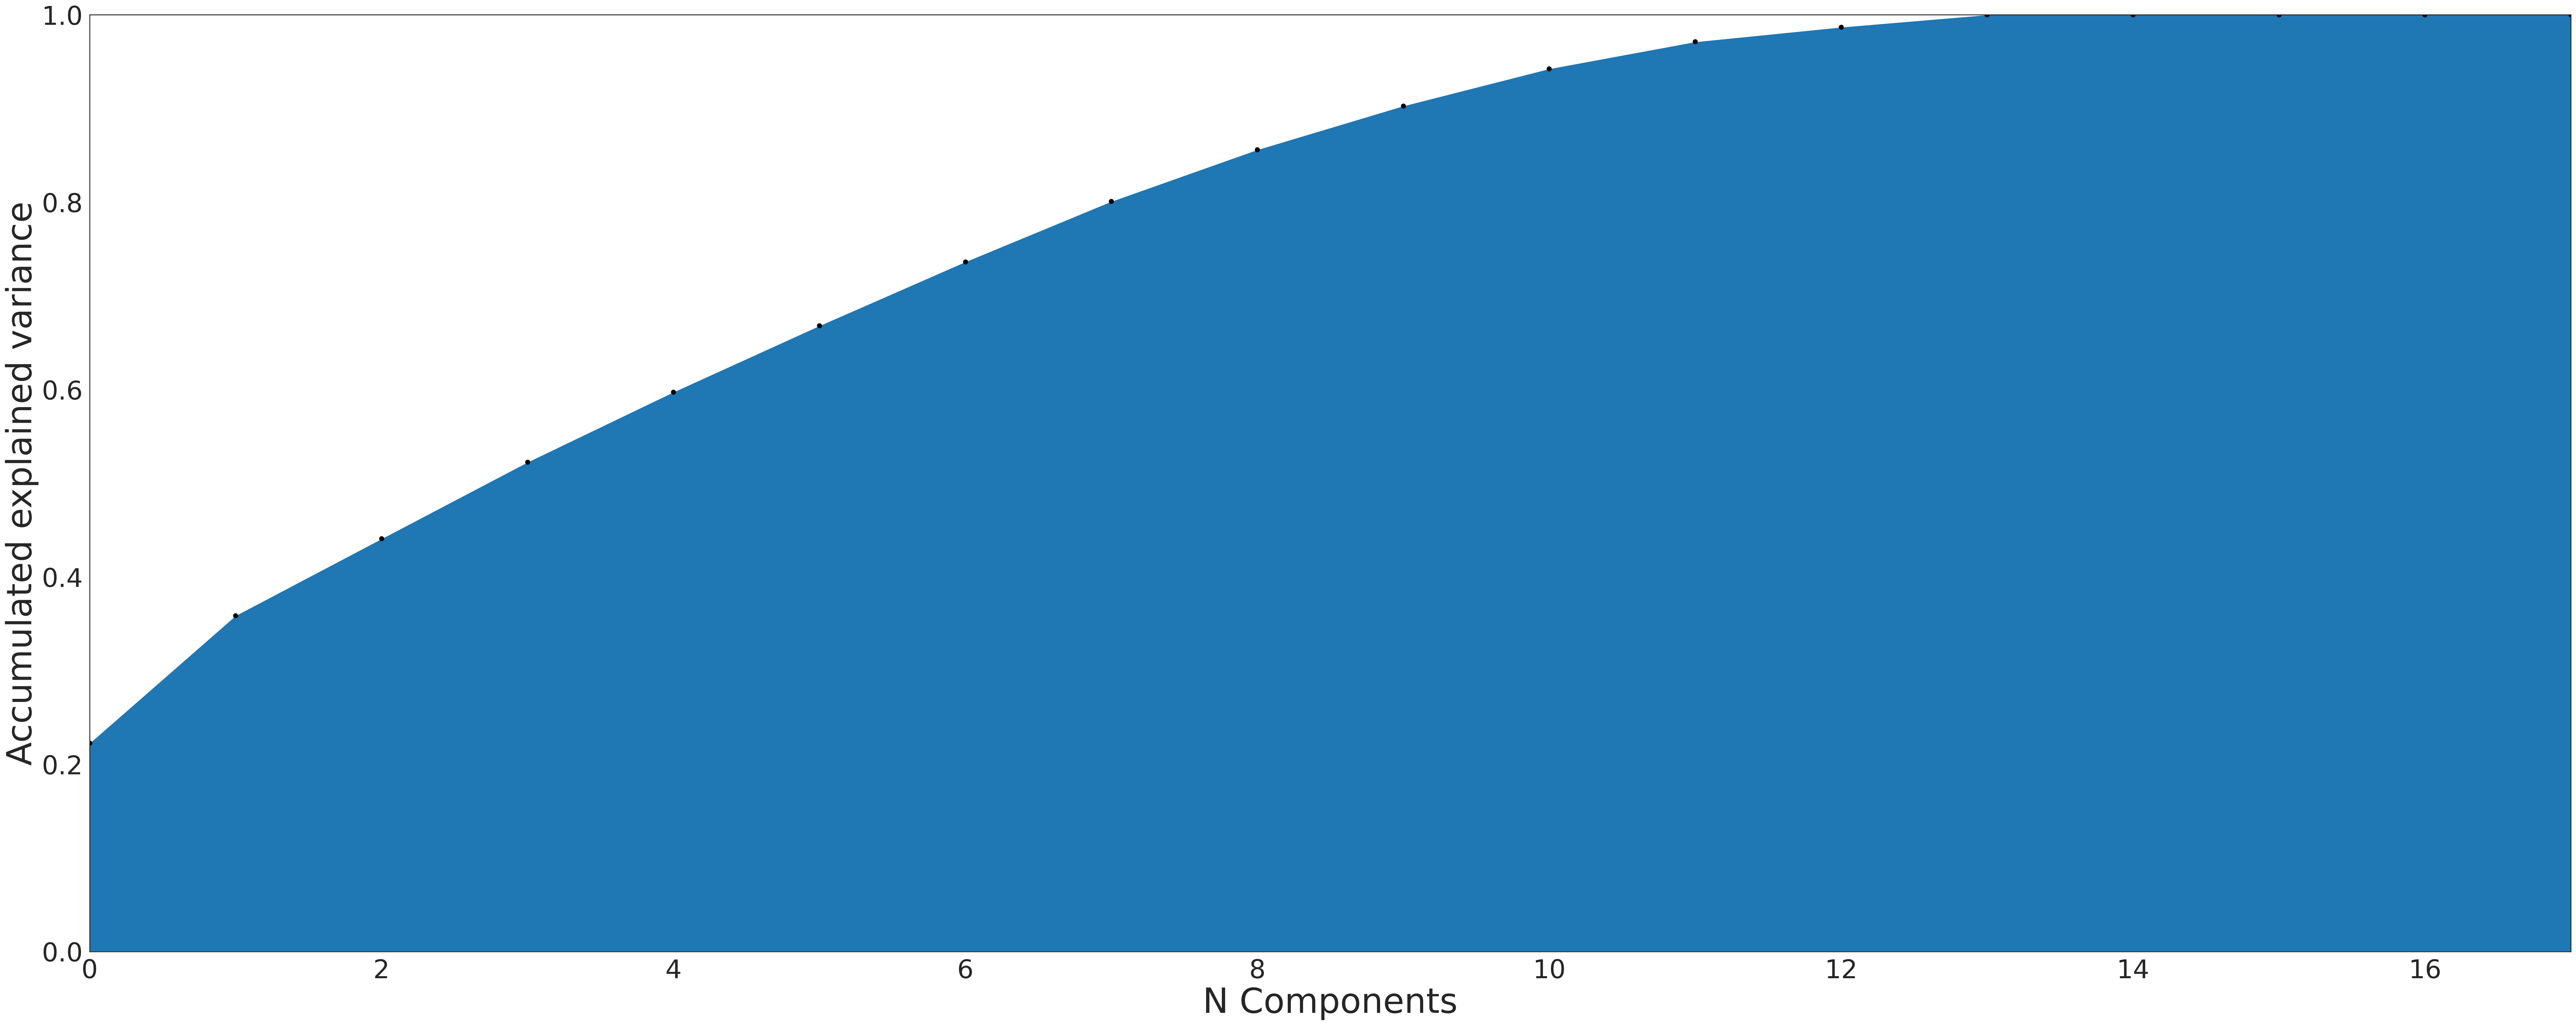

In [ ]:
plot_explained_variance(pca)

In [ ]:
threshold = 0.99
num = next(i for i, x in enumerate(accumulate(pca.explained_variance_ratio_), 1) if x >= threshold)
print(f'We can keep the first {num} components and discard the other {pca.n_components_-num},')
print(f'keeping >={100 * threshold}% of the explained variance!')

We can keep the first 14 components and discard the other 4,
keeping >=99.0% of the explained variance!


In [ ]:
# data_PCA.drop([f'Component {i}' for i in range(num, pca.n_components_)], axis=1, inplace=True)
data_PCA.head()

Projection on Component 1  Projection on Component 2  \
0                   1.547343                   0.046251   
1                  -1.559538                  -0.070002   
2                   1.711256                   2.419251   
3                   0.090115                   1.139688   
4                   4.404165                   0.119579   

   Projection on Component 3  Projection on Component 4  \
0                  -2.982741                  -1.447096   
1                   0.884866                   2.091962   
2                   1.182222                  -1.078022   
3                   1.132650                   0.290171   
4                  -0.234317                  -0.330618   

   Projection on Component 5  Projection on Component 6  \
0                   1.770587                  -1.340697   
1                   0.878254                   0.249955   
2                   0.588804                  -0.654726   
3                   1.112447                   1.301555   
4                   2.464296                   0.040105   

   Projection on Component 7  Projection on Component 8  \
0                   0.533610                  -0.071324   
1                   1.785275                  -0.137932   
2                   1.948308                   0.751951   
3                   1.389171                  -0.437299   
4                  -0.146764                   0.950040   

   Projection on Component 9  Projection on Component 10  \
0                   0.490579                    0.074311   
1                  -0.442114                   -0.130934   
2                   0.397110                    0.916529   
3                  -1.007516                    0.474931   
4                   2.059576                    0.622163   

   Projection on Component 11  Projection on Component 12  \
0                   -0.606460                   -0.475134   
1                   -0.467450                   -0.152023   
2                   -0.446104                   -0.691643   
3                    1.518574                    1.040331   
4                    0.622127                    0.713522   

   Projection on Component 13  Projection on Component 14  \
0                    0.021930                    0.650801   
1                   -0.501317                    0.104555   
2                   -0.190741                    0.363812   
3                    0.626225                   -0.182861   
4                   -0.045187                   -0.543115   

   Projection on Component 15  Projection on Component 16  \
0                2.715266e-16                5.571323e-17   
1               -3.319201e-17                2.245461e-17   
2                1.491634e-16                8.552057e-17   
3               -2.805534e-16               -1.117703e-16   
4               -7.921553e-17                5.391562e-17   

   Projection on Component 17  
0               -8.227530e-17  
1                9.724708e-17  
2                1.290228e-16  
3               -1.056558e-16  
4                3.436511e-16

In [ ]:
plot_explained_variance(pca)
plt.show()

In [ ]:
threshold = 0.60
components = np.cumsum(pca.explained_variance_ratio_) < threshold
components.sum()

5

In [ ]:
np.argwhere(pca.explained_variance_ratio_.cumsum() >= 0.95)[0][0] + 1

12

Dimensionality reduction

In [ ]:
pca = PCA(n_components=12)
reduced_data = pca.fit(data).transform(data)

In [ ]:
pd.DataFrame(reduced_data, columns=[f'Component {i}' for i in range(reduced_data.shape[1])]).head()

Component 0  Component 1  Component 2  Component 3  Component 4  \
0     1.547343     0.046251    -2.982741    -1.447096     1.770587   
1    -1.559538    -0.070002     0.884866     2.091962     0.878254   
2     1.711256     2.419251     1.182222    -1.078022     0.588804   
3     0.090115     1.139688     1.132650     0.290171     1.112447   
4     4.404165     0.119579    -0.234317    -0.330618     2.464296   

   Component 5  Component 6  Component 7  Component 8  Component 9  \
0    -1.340697     0.533610    -0.071324     0.490579     0.074311   
1     0.249955     1.785275    -0.137932    -0.442114    -0.130934   
2    -0.654726     1.948308     0.751951     0.397110     0.916529   
3     1.301555     1.389171    -0.437299    -1.007516     0.474931   
4     0.040105    -0.146764     0.950040     2.059576     0.622163   

   Component 10  Component 11  
0     -0.606460     -0.475134  
1     -0.467450     -0.152023  
2     -0.446104     -0.691643  
3      1.518574      1.040331  
4      0.622127      0.713522

###SVD

In [ ]:
from os import listdir,getcwd
from os.path import isfile, join
from random import randint
from PIL import Image

from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

from sympy import Matrix, init_printing,Symbol
from numpy.linalg import qr,eig,inv,matrix_rank,inv,svd
init_printing()

In [ ]:
def get_data_Matrix (mypath="peds"):
    cwd = getcwd()

    mypath=join(cwd,mypath)
    files = [ join(mypath,f) for f in listdir(mypath) if isfile(join(mypath, f)) and f.startswith(".")==False]
    # Read image
    img = Image.open(files[0])
    I=np.array(img)
    # Output Images

    Length,Width=I.shape

    X=np.zeros((len(files),Length*Width))
    for i,file in enumerate(files):
        img = Image.open(file)
        I=np.array(img)
        X[i,:]=I.reshape(1,-1)
    return X,Length,Width

###Dimensionality Reduction

In [ ]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

# The custom NumPy log transformer
log_transformer = FunctionTransformer(np.log1p)

# The pipeline
estimators = [('log1p', log_transformer), ('minmaxscale', MinMaxScaler())]
pipeline = Pipeline(estimators)

# Convert the original data
data_pipe = pipeline.fit_transform(data)

In [ ]:
np.allclose(data_pipe, data)

False

In [ ]:
from sklearn.decomposition import PCA

pca_list = list()
feature_weight_list = list()

# Fit a range of PCA models

for n in range(1, 6):

    # Create and fit the model
    PCAmod = PCA(n_components=n)
    PCAmod.fit(data)

    # Store the model and variance
    pca_list.append(pd.Series({'n':n, 'model':PCAmod,
                               'var': PCAmod.explained_variance_ratio_.sum()}))

    # Calculate and store feature importances
    abs_feature_values = np.abs(PCAmod.components_).sum(axis=0)
    feature_weight_list.append(pd.DataFrame({'n':n,
                                             'features': data.columns,
                                             'values':abs_feature_values/abs_feature_values.sum()}))

pca_df = pd.concat(pca_list, axis=1).T.set_index('n')
pca_df

model       var
n                               
1  PCA(n_components=1)  0.222433
2  PCA(n_components=2)  0.358589
3  PCA(n_components=3)   0.44068
4  PCA(n_components=4)  0.522458
5  PCA(n_components=5)  0.597297

In [ ]:
features_df = (pd.concat(feature_weight_list)
               .pivot(index='n', columns='features', values='values'))

features_df

features  BMI (scaled)  BPMeds (scaled)  TenYearCHD (scaled)  age (scaled)  \
n                                                                            
1             0.093662     3.301929e-26             0.049278      0.101517   
2             0.060033     0.000000e+00             0.058224      0.068569   
3             0.062542     4.777800e-18             0.096608      0.102575   
4             0.068335     6.189427e-18             0.085813      0.087088   
5             0.074440     1.660472e-17             0.072037      0.076218   

features  cigsPerDay (scaled)  cluster (scaled)  diaBP (scaled)  \
n                                                                 
1                    0.056258               0.0        0.142772   
2                    0.140933               0.0        0.109163   
3                    0.098577               0.0        0.106220   
4                    0.083821               0.0        0.086123   
5                    0.069595               0.0        0.075205   

features  diabetes (scaled)  education (scaled)  glucose (scaled)  \
n                                                                   
1              0.000000e+00            0.036373          0.035536   
2              1.863313e-23            0.023072          0.025682   
3              6.369883e-18            0.048040          0.040048   
4              1.237885e-18            0.041518          0.053186   
5              8.553698e-18            0.066954          0.063347   

features  heartRate (scaled)  id (scaled)  is_smoking (scaled)  \
n                                                                
1                   0.038434     0.006407             0.068098   
2                   0.043725     0.003946             0.139279   
3                   0.047657     0.005591             0.098446   
4                   0.100717     0.008557             0.091727   
5                   0.087179     0.058225             0.076359   

features  prevalentHyp (scaled)  prevalentStroke (scaled)  sex (scaled)  \
n                                                                         
1                      0.138988              0.000000e+00      0.011972   
2                      0.101526              1.192520e-21      0.074094   
3                      0.085229              7.593490e-25      0.051748   
4                      0.066646              2.011593e-17      0.087908   
5                      0.059617              6.037902e-18      0.080640   

features  sysBP (scaled)  totChol (scaled)  
n                                           
1               0.157080          0.063626  
2               0.112163          0.039592  
3               0.086989          0.069729  
4               0.068447          0.070115  
5               0.059983          0.080202

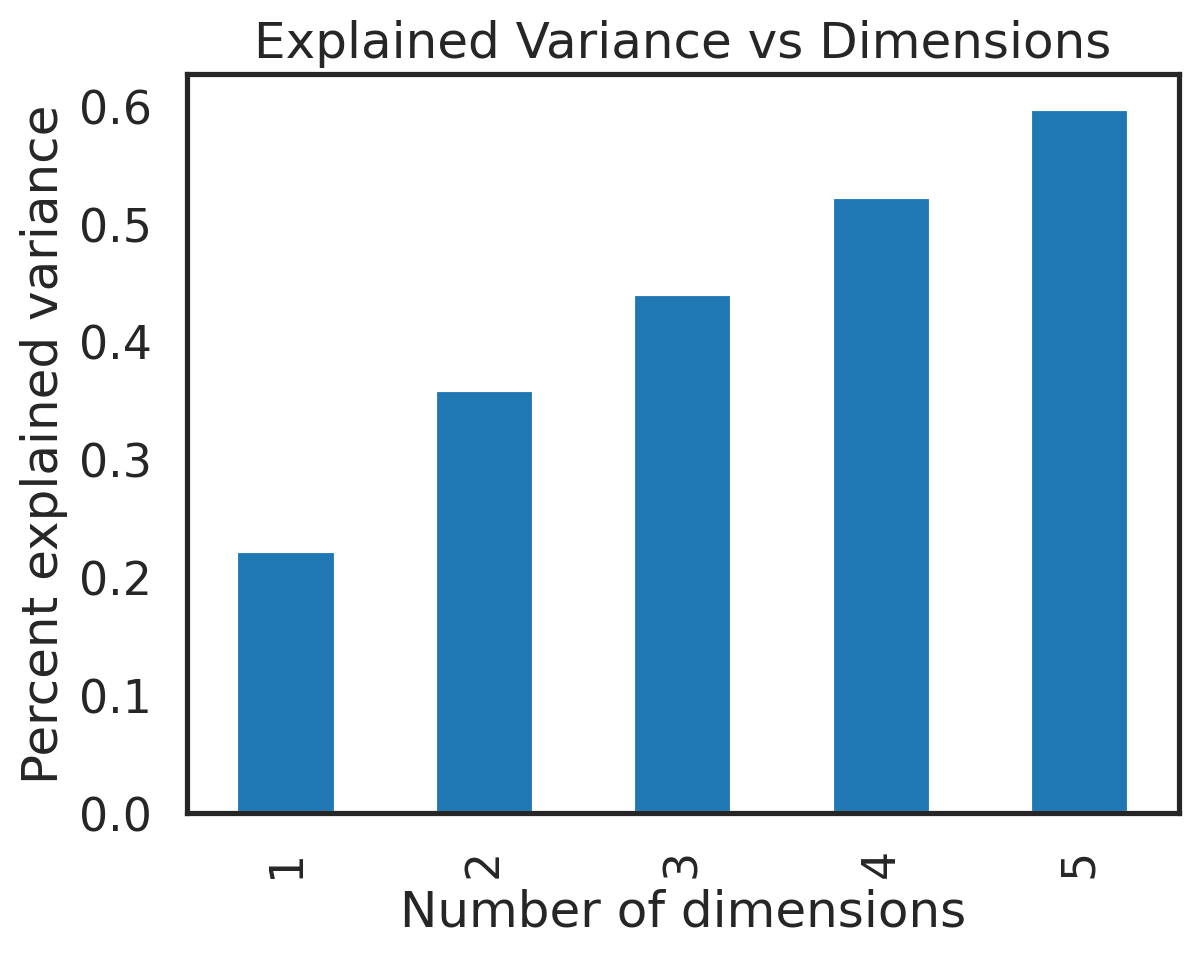

In [ ]:
sns.set_context('talk')
ax = pca_df['var'].plot(kind='bar')

ax.set(xlabel='Number of dimensions',
       ylabel='Percent explained variance',
       title='Explained Variance vs Dimensions');

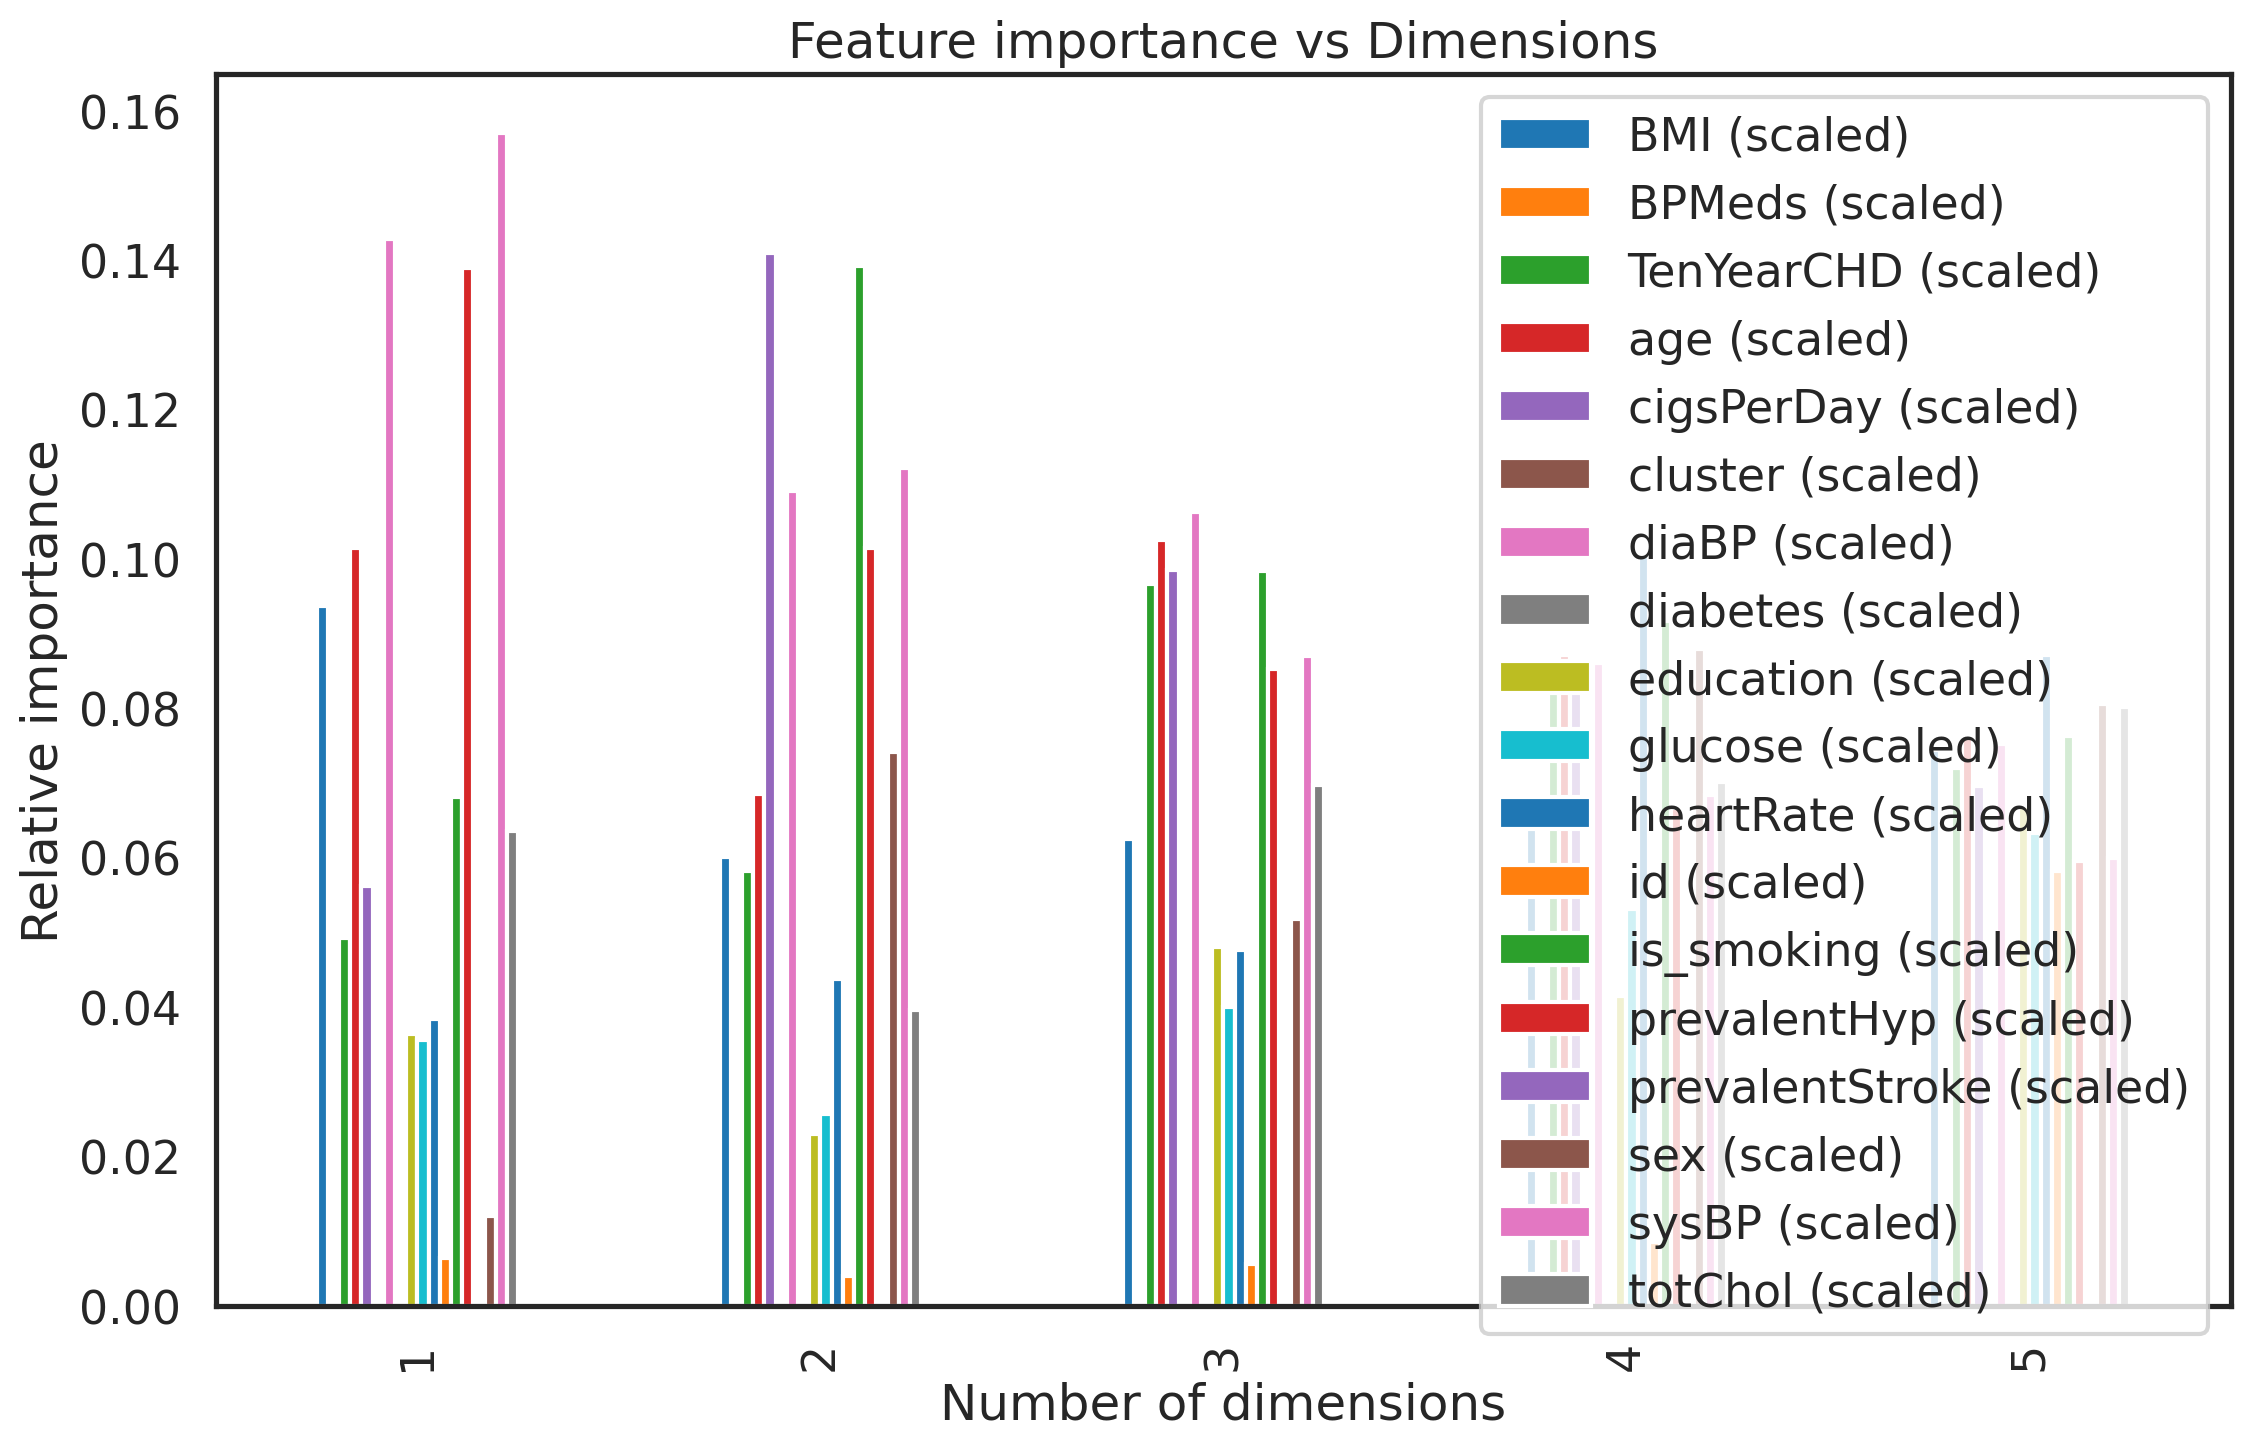

In [ ]:
ax = features_df.plot(kind='bar', figsize=(13,8))
ax.legend(loc='upper right')
ax.set(xlabel='Number of dimensions',
       ylabel='Relative importance',
       title='Feature importance vs Dimensions');

In [ ]:
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Custom scorer--use negative rmse of inverse transform
def scorer(pcamodel, X, y=None):

    try:
        X_val = X.values
    except:
        X_val = X

    # Calculate and inverse transform the data
    data_inv = pcamodel.fit(X_val).transform(X_val)
    data_inv = pcamodel.inverse_transform(data_inv)

    # The error calculation
    mse = mean_squared_error(data_inv.ravel(), X_val.ravel())

    # Larger values are better for scorers, so take negative value
    return -1.0 * mse

# The grid search parameters
param_grid = {'gamma':[0.001, 0.01, 0.05, 0.1, 0.5, 1.0],
              'n_components': [2, 3, 4]}

# The grid search
kernelPCA = GridSearchCV(KernelPCA(kernel='rbf', fit_inverse_transform=True),
                         param_grid=param_grid,
                         scoring=scorer,
                         n_jobs=-1)


kernelPCA = kernelPCA.fit(data)

kernelPCA.best_estimator_

KernelPCA(fit_inverse_transform=True, gamma=0.05, kernel='rbf', n_components=4)

In [ ]:
data.head()

id (scaled)  age (scaled)  education (scaled)  sex (scaled)  \
0    -1.731540     -1.576140            1.990429      1.144621   
1    -1.730518     -0.411899           -0.953518     -0.873652   
2    -1.729495      0.053798           -0.953518      1.144621   
3    -1.728473      1.683735           -0.953518     -0.873652   
4    -1.727451      1.334463            1.009114     -0.873652   

   is_smoking (scaled)  cigsPerDay (scaled)  BPMeds (scaled)  \
0            -0.994996            -0.764362              0.0   
1             1.005029             0.080993              0.0   
2             1.005029             0.926349              0.0   
3             1.005029             1.771705              0.0   
4            -0.994996            -0.764362              0.0   

   prevalentStroke (scaled)  prevalentHyp (scaled)  diabetes (scaled)  \
0                       0.0               1.473178                0.0   
1                       0.0              -0.678805                0.0   
2                       0.0               1.473178                0.0   
3                       0.0              -0.678805                0.0   
4                       0.0               1.473178                0.0   

   TenYearCHD (scaled)  totChol (scaled)  diaBP (scaled)  sysBP (scaled)  \
0            -0.420886         -0.502638        1.250979        1.488105   
1            -0.420886          0.383846       -1.017436       -0.744992   
2             2.375942          0.005204        0.493423        1.187398   
3            -0.420886          0.186714        0.249289        0.367546   
4             2.375942          0.837324        2.734854        1.846358   

   BMI (scaled)  glucose (scaled)  heartRate (scaled)  cluster (scaled)  
0      1.016439         -0.243303           -0.269818               0.0  
1     -1.469859          0.951051            1.029068               0.0  
2      0.676233          0.951051           -0.639788               0.0  
3      0.236212         -0.083544           -0.452160               0.0  
4      1.649923         -1.224976            0.804558               0.0

In [ ]:
data.rename(columns = {'TenYearCHD (scaled)':'TenYearCHD'}, inplace = True)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = data.drop('TenYearCHD', axis=1)
y = data.TenYearCHD
sss = StratifiedShuffleSplit(n_splits=5, random_state=42)

def get_avg_score(n):
    pipe = [
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=n)),
        ('estimator', LogisticRegression(solver='liblinear'))
    ]
    pipe = Pipeline(pipe)
    scores = []
    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]
        pipe.fit(X_train, y_train)
        scores.append(accuracy_score(y_test, pipe.predict(X_test)))
    return np.mean(scores)


ns = [10, 20, 50, 100, 150, 200, 300, 400]
score_list = [get_avg_score(n) for n in ns]

###Kernel PCA

In [ ]:
from itertools import accumulate
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA,KernelPCA
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
def plot_proj(A,v,y,name=None):

    plt.scatter(A[:,0],A[:,1],label='data',c=y,cmap='viridis')

    #plt.plot(np.linspace(A[:,0].min(),A[:,0].max()),np.linspace(A[:,1].min(),A[:,1].max())*(v[1]/v[0]),color='black',linestyle='--',linewidth=1.5,label=name)
    plt.plot(np.linspace(-1,1),np.linspace(-1,1)*(v[1]/v[0]),color='black',linestyle='--',linewidth=1.5,label=name)
    # Run through all the data

    for i in range(len(A[:,0])-1):
        #data point
        w=A[i,:]

        # projection
        cv = (np.dot( A[i,:],v))/np.dot(v,np.transpose(v))*v

        # line between data point and projection
        plt.plot([A[i,0],cv[0]],[A[i,1],cv[1]],'r--',linewidth=1.5)
    plt.plot([A[-1,0],cv[0]],[A[-1,1],cv[1]],'r--',linewidth=1.5,label='projections' )
    plt.legend()
    plt.show()

In [ ]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

# Create the toy dataset
X, y = make_circles(n_samples=1000, factor=0.01, noise=0.05, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

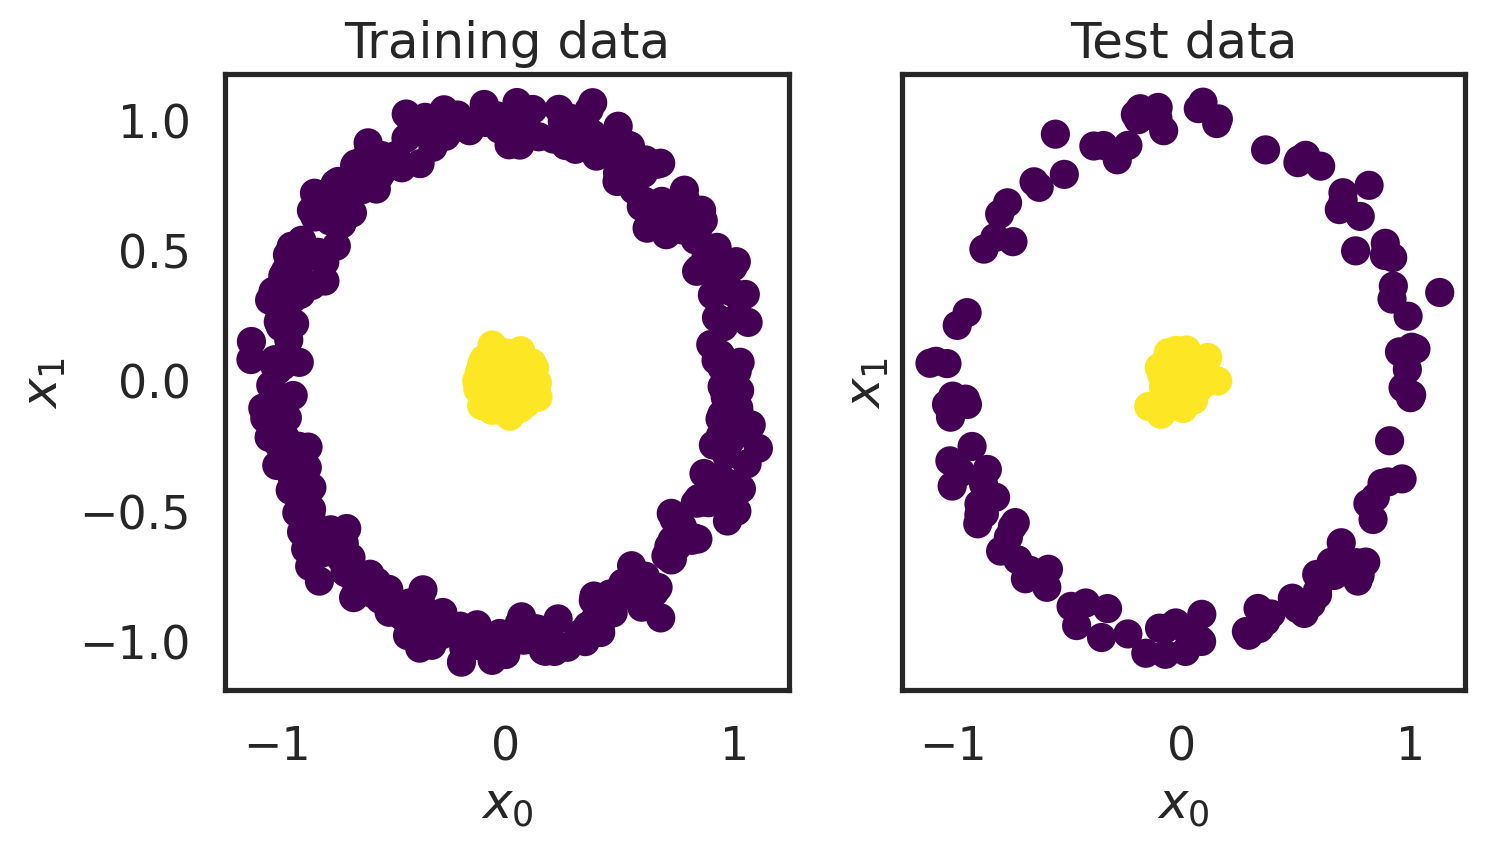

In [ ]:
# Visualize the data
_, (train_ax, test_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 4))

train_ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train,cmap='viridis')
train_ax.set_xlabel("$x_{0}$")
train_ax.set_ylabel("$x_{1}$")
train_ax.set_title("Training data")

test_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test,cmap='viridis')
test_ax.set_xlabel("$x_{0}$")
test_ax.set_ylabel("$x_{1}$")
test_ax.set_title("Test data")
plt.show()

In [ ]:
from sklearn.decomposition import PCA

# Fit on a PCA object
pca = PCA(n_components=2)

score_pca = pca.fit(X_train).transform(X_test)
pca

PCA(n_components=2)

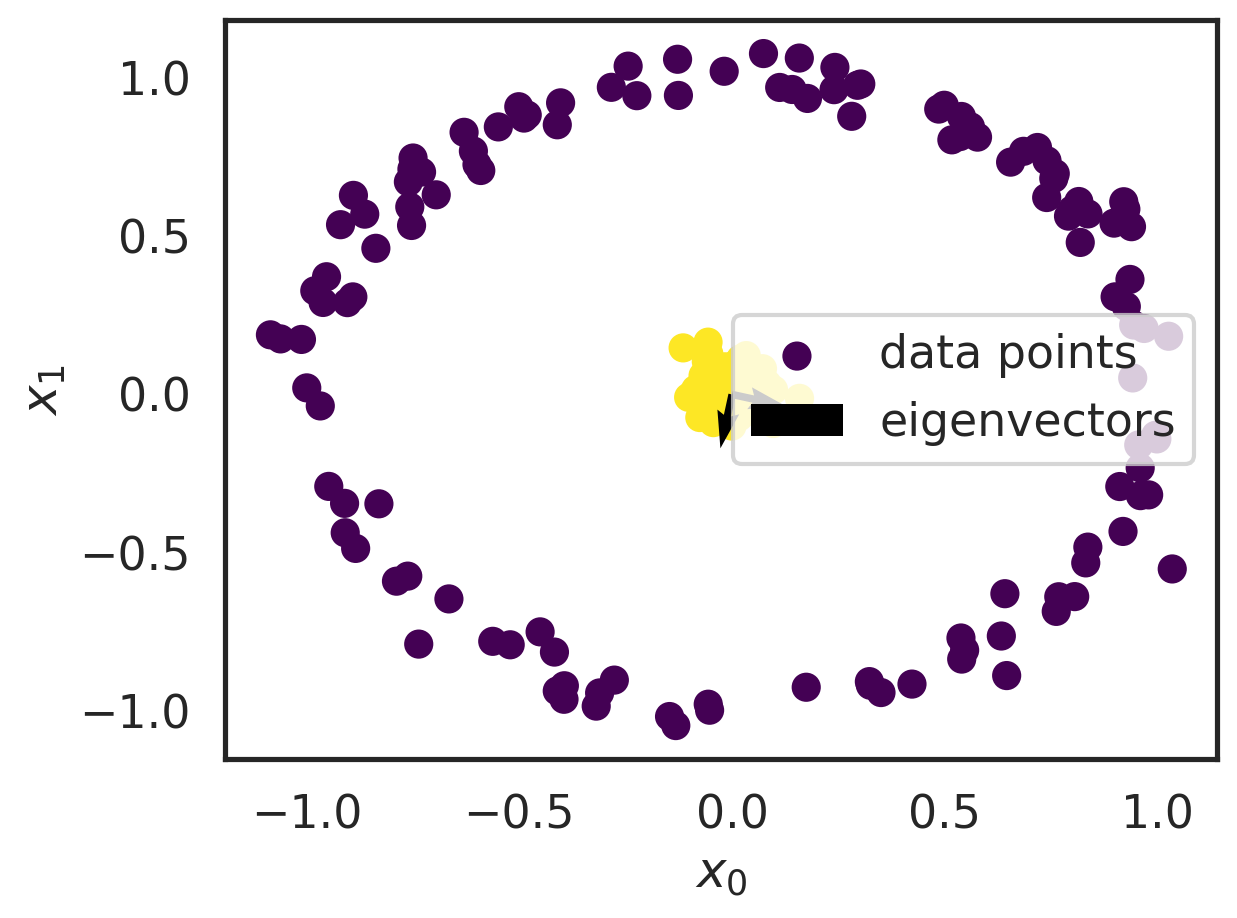

In [ ]:
plt.scatter(score_pca[:, 0], score_pca[:, 1], c=y_test,label="data points", cmap='viridis')
plt.quiver([0,0],[0,0], pca.components_[0,:], pca.components_[1,:], label="eigenvectors")
plt.xlabel("$x_{0}$")
plt.ylabel("$x_{1}$")
plt.legend(loc='center right')
plt.show()

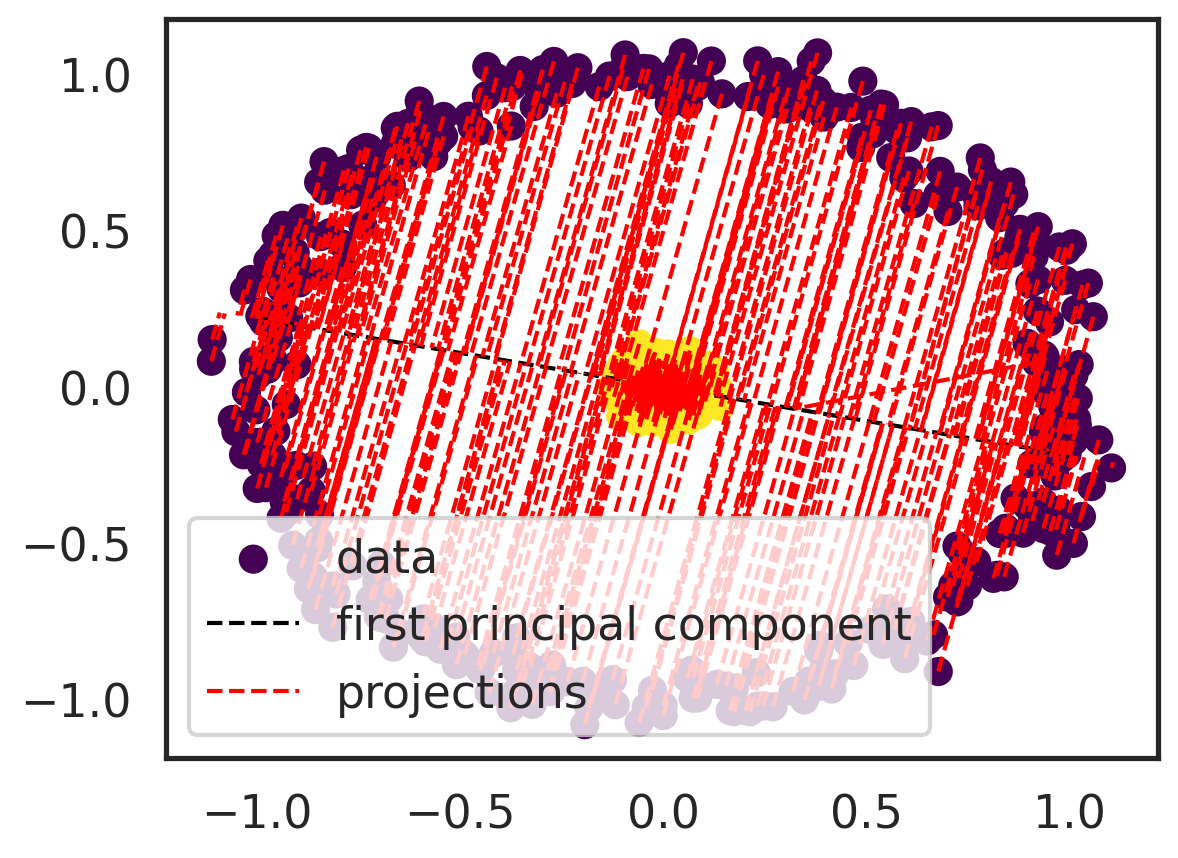

In [ ]:
plot_proj(X_train,pca.components_[0,:],y_train,"first principal component")

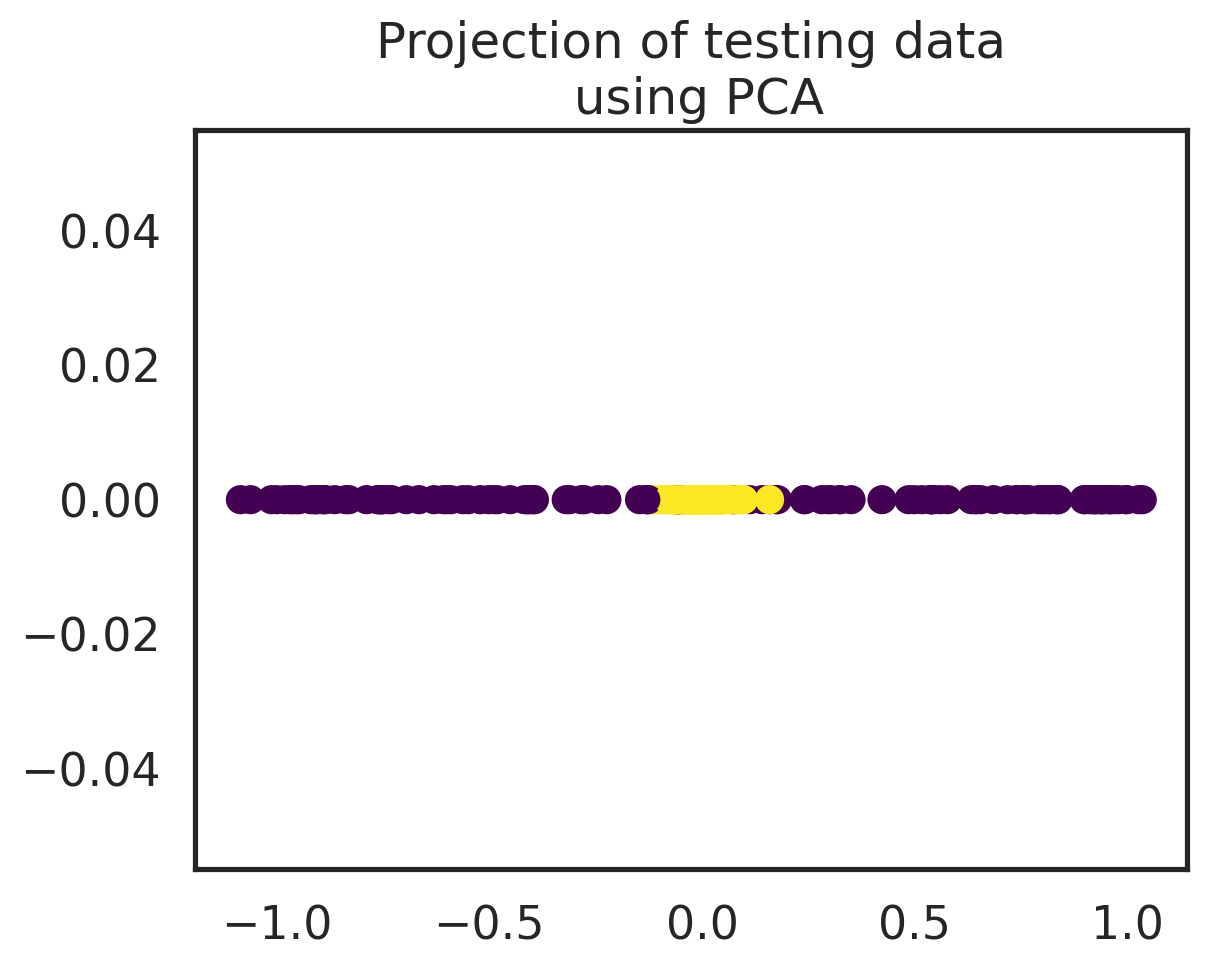

In [ ]:
plt.scatter(score_pca [:,0],np.zeros(score_pca[:,0].shape[0]),c=y_test,cmap='viridis')
plt.title("Projection of testing data\n using PCA")
plt.show()

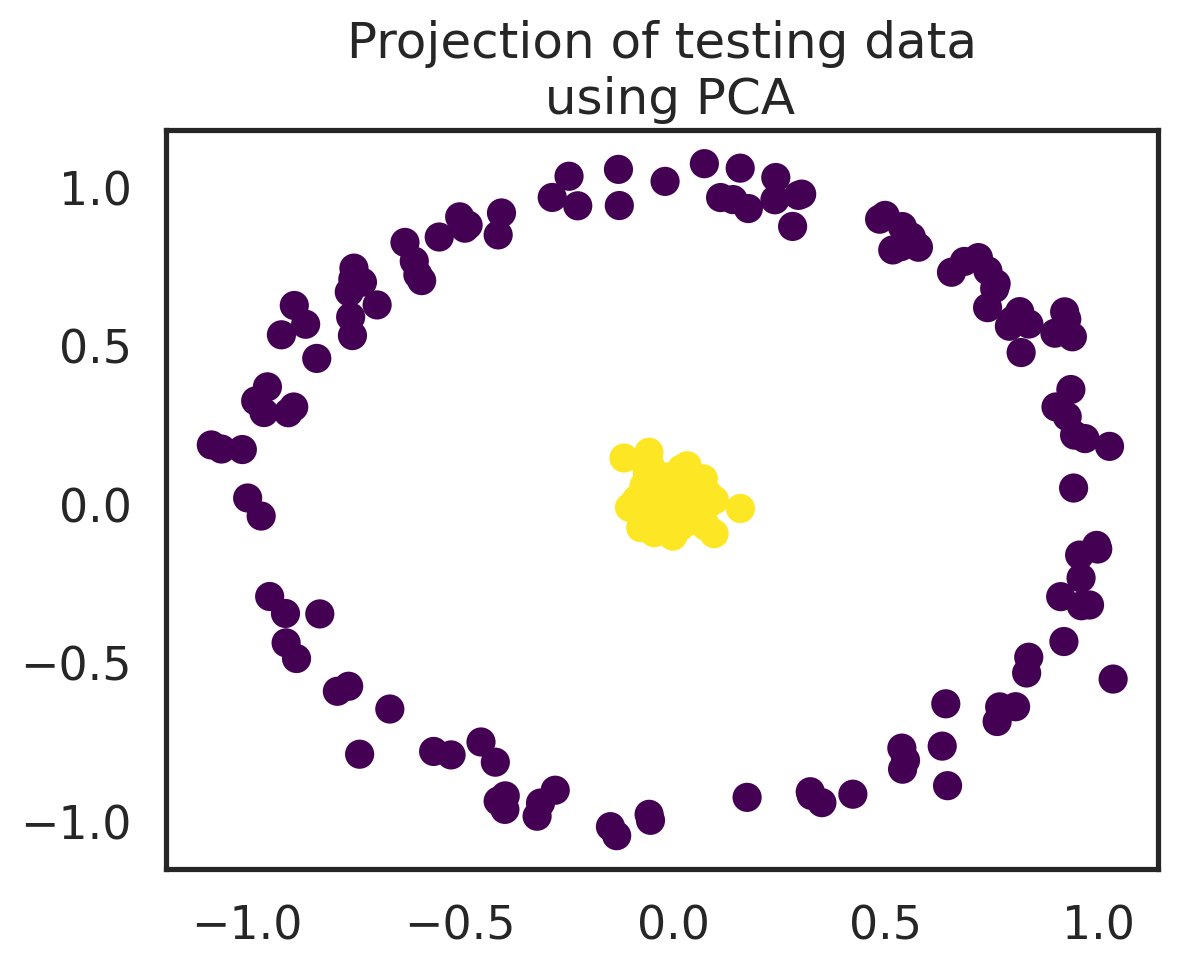

In [ ]:
plt.scatter(score_pca[:, 0], score_pca[:, 1], c=y_test,cmap='viridis')
plt.title("Projection of testing data\n using PCA")
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression().fit(X_train, y_train)
print(str.format("Test set  mean accuracy score for for PCA: {}", lr.score(X_test, y_test)))

Test set  mean accuracy score for for PCA: 0.496


In [ ]:
PHI_train=np.concatenate((X_train, (X_train**2).sum(axis=1).reshape(-1,1)),axis=1)
PHI_test=np.concatenate((X_test, (X_test**2).sum(axis=1).reshape(-1,1)),axis=1)

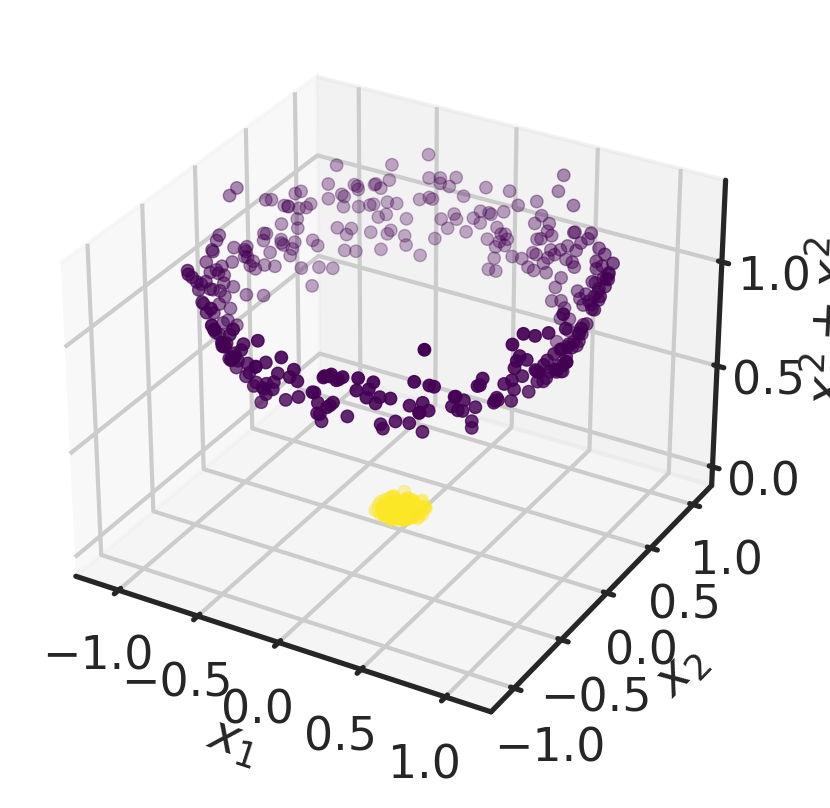

In [ ]:
# Plot in 3D
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(PHI_train[:,0], PHI_train[:,1],  PHI_train[:,2], c=y_train, cmap='viridis', linewidth=0.5);
ax.set_xlabel('$x_{1}$')
ax.set_ylabel('$x_{2}$')
ax.set_zlabel('$x_{1}^2+x_{2}^2$')
plt.show()

In [ ]:
pca = PCA(n_components=3)
score_polly = pca.fit(PHI_train).transform(PHI_test)

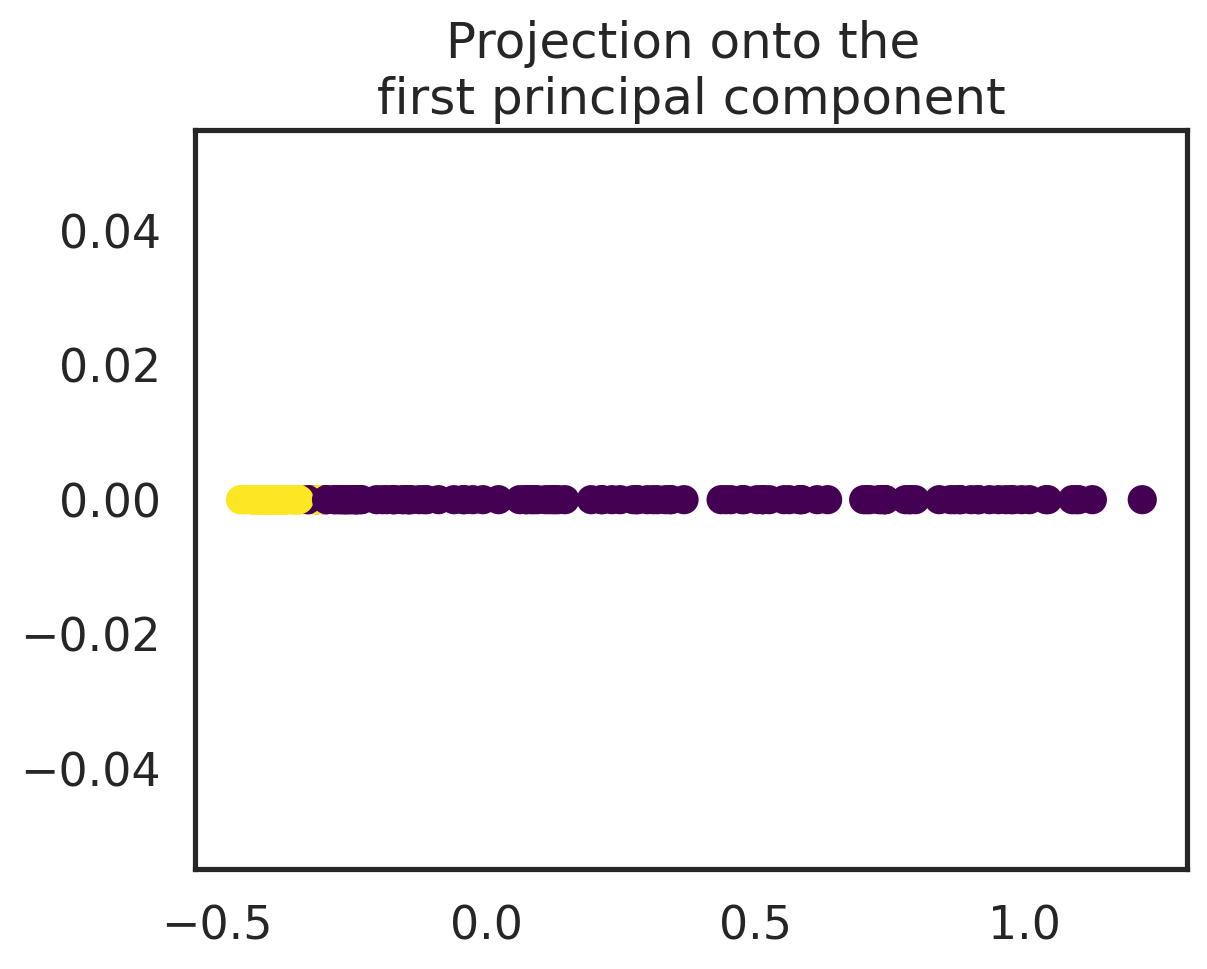

In [ ]:
plt.scatter(score_polly[:,0],np.zeros(score_polly[:,1].shape[0]),c=y_test,cmap='viridis')
plt.title("Projection onto the \nfirst principal component")
plt.show()

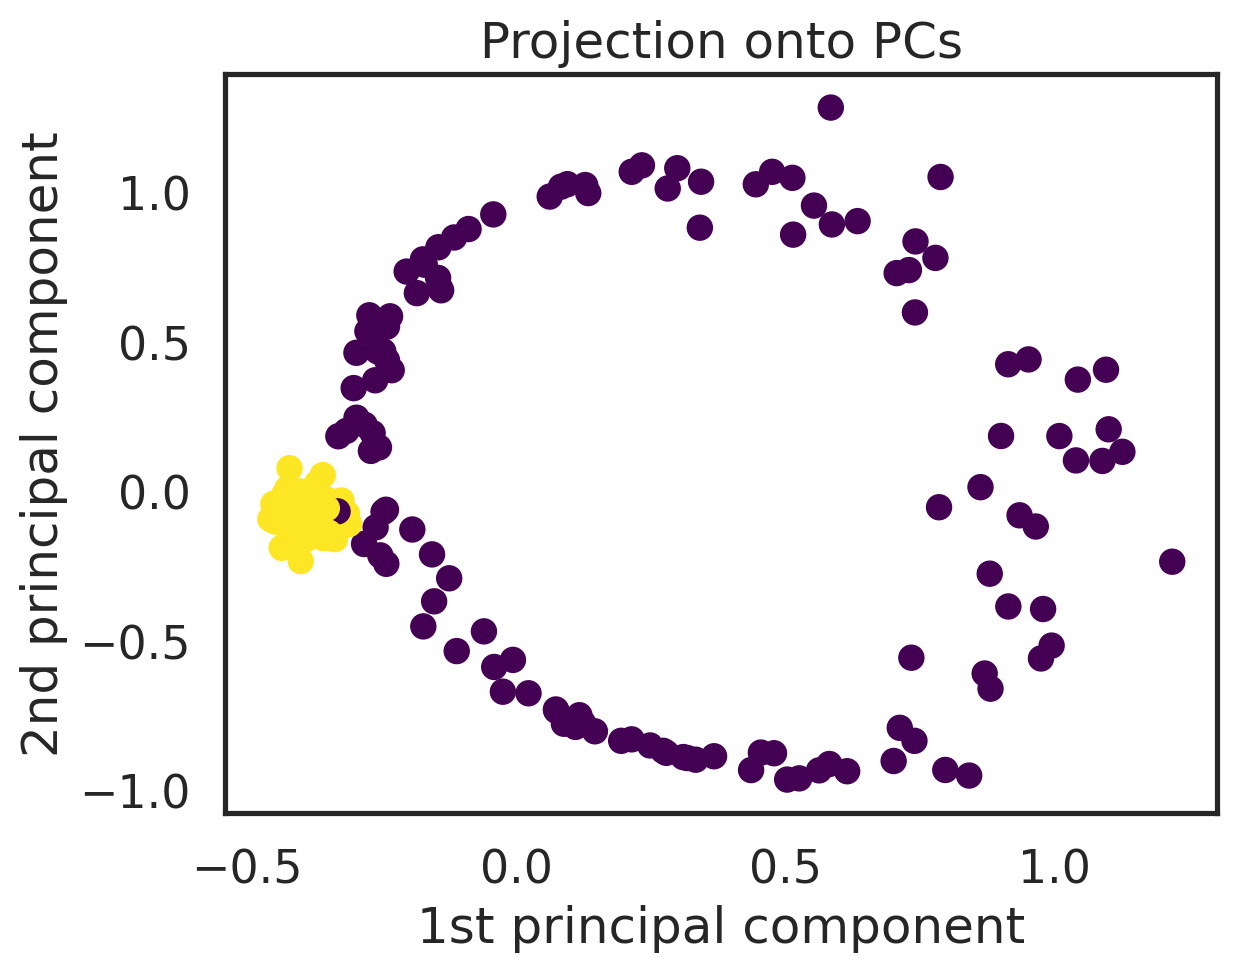

In [ ]:
plt.scatter(score_polly[:,0], score_polly[:,1],c=y_test, cmap='viridis', linewidth=0.5);
plt.xlabel("1st principal component")
plt.ylabel("2nd principal component")
plt.title("Projection onto PCs")
plt.show()

In [ ]:
lr= LogisticRegression().fit(PHI_train, y_train)
print(str.format("Test set  mean accuracy score for for Kernal PCA: {}", lr.score(PHI_test, y_test)))

Test set  mean accuracy score for for Kernal PCA: 1.0


###Applying Kernel PCA

In [ ]:
kernel_pca = KernelPCA( kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1)

In [ ]:
kernel_pca.fit(X_train)

KernelPCA(alpha=0.1, fit_inverse_transform=True, gamma=10, kernel='rbf')

In [ ]:
score_kernel_pca = kernel_pca.transform(X_test)

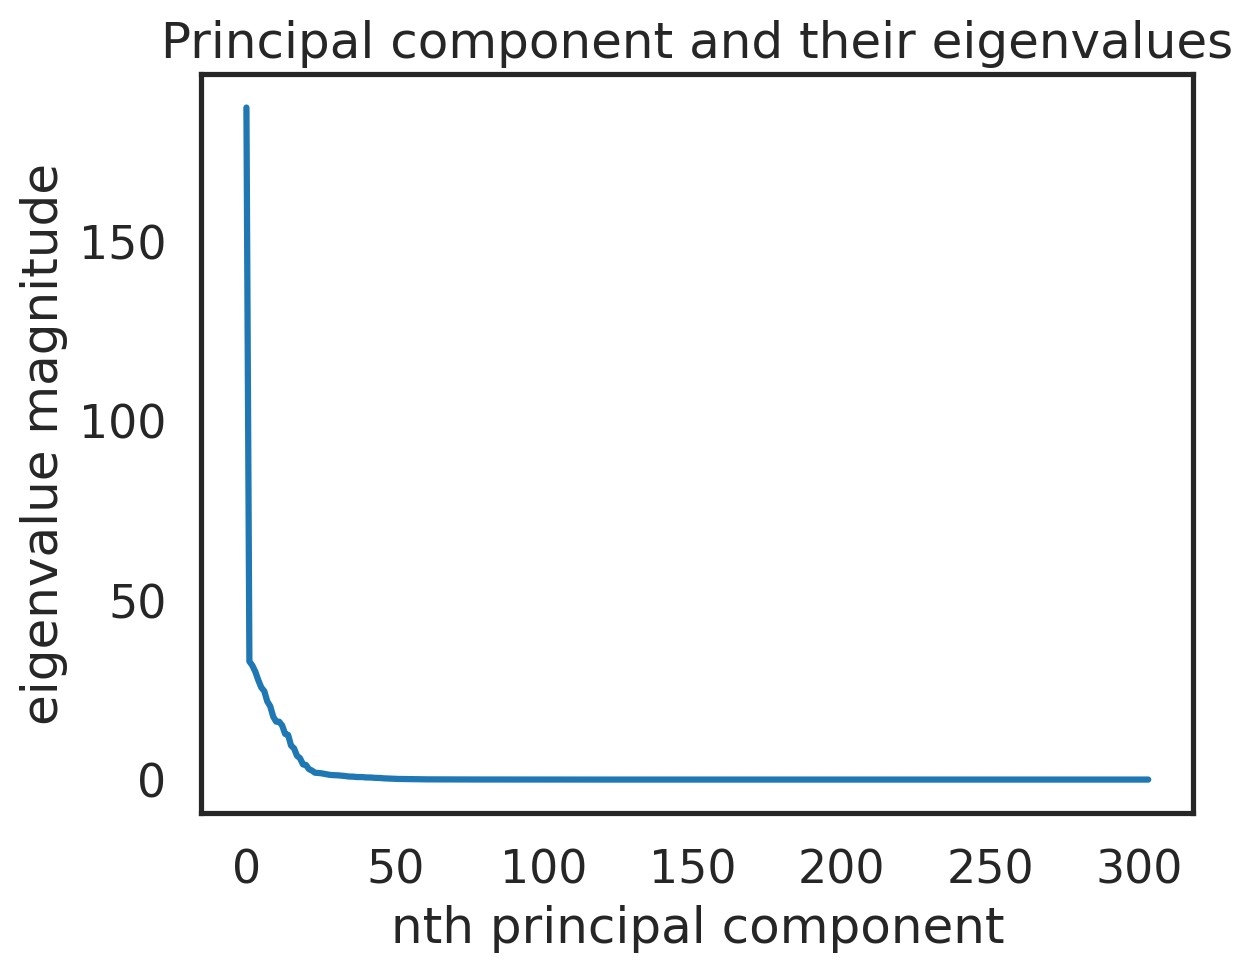

In [ ]:
plt.plot(kernel_pca.eigenvalues_)

plt.title("Principal component and their eigenvalues")
plt.xlabel("nth principal component")
plt.ylabel("eigenvalue magnitude")
plt.show()

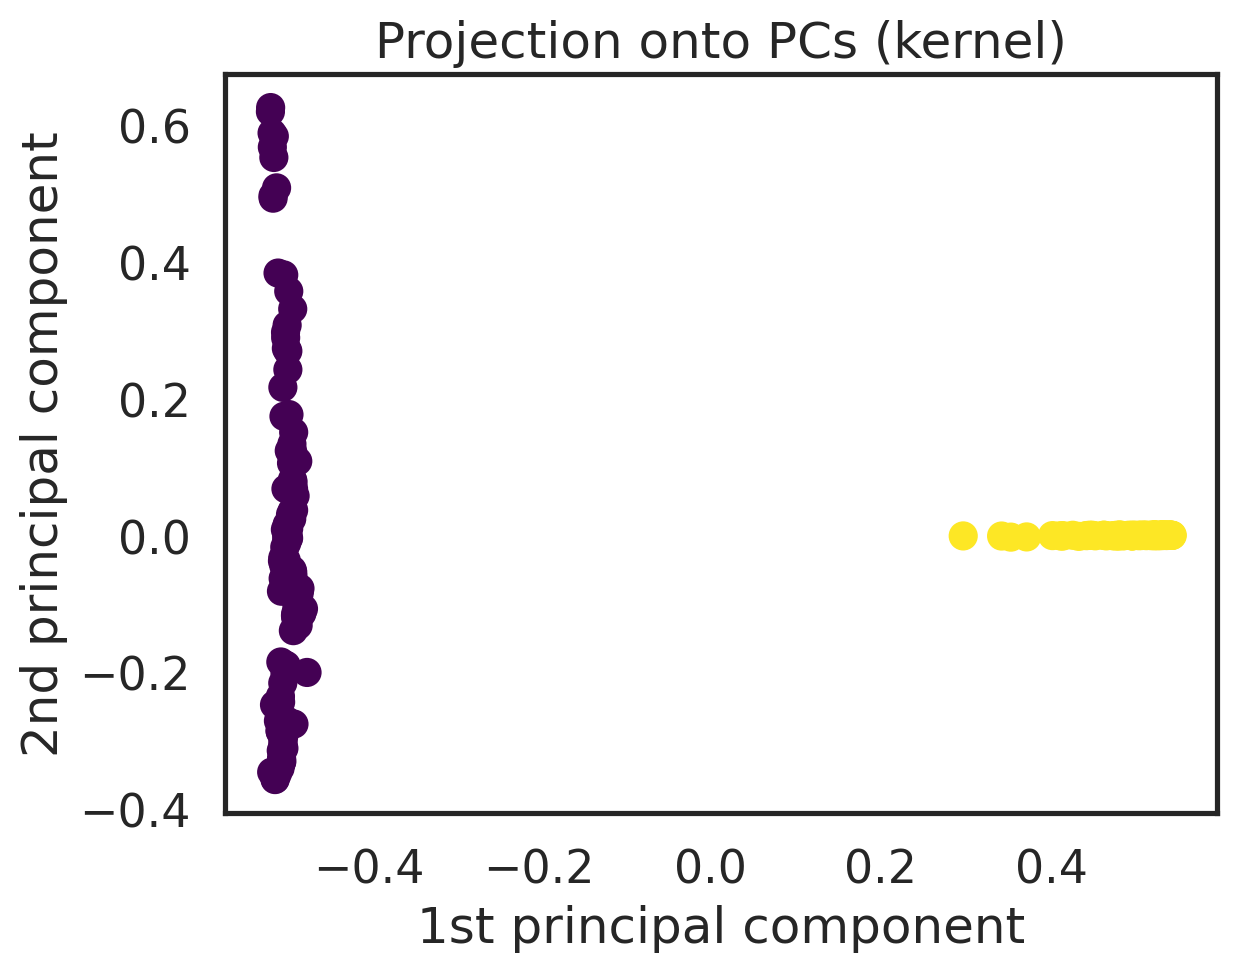

In [ ]:
plt.scatter(score_kernel_pca[:,0],score_kernel_pca[:,1] ,c=y_test,cmap='viridis')
plt.title("Projection onto PCs (kernel)")
plt.xlabel("1st principal component")
plt.ylabel("2nd principal component")
plt.show()

In [ ]:
X_hat_kpca = kernel_pca.inverse_transform(kernel_pca.transform(X_test))

pca = PCA(n_components=2)
pca.fit(X_train)
X_hat_pca = pca.inverse_transform(pca.transform(X_test))

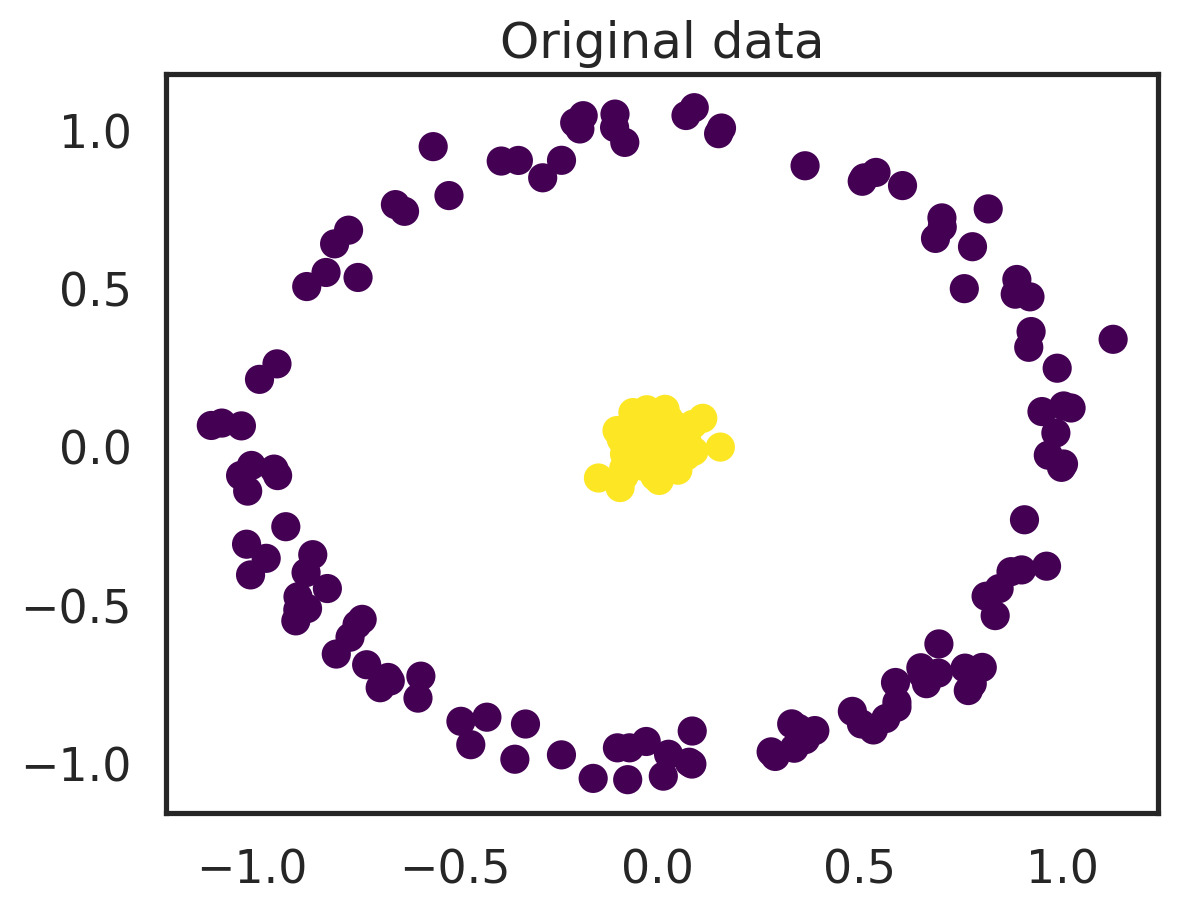

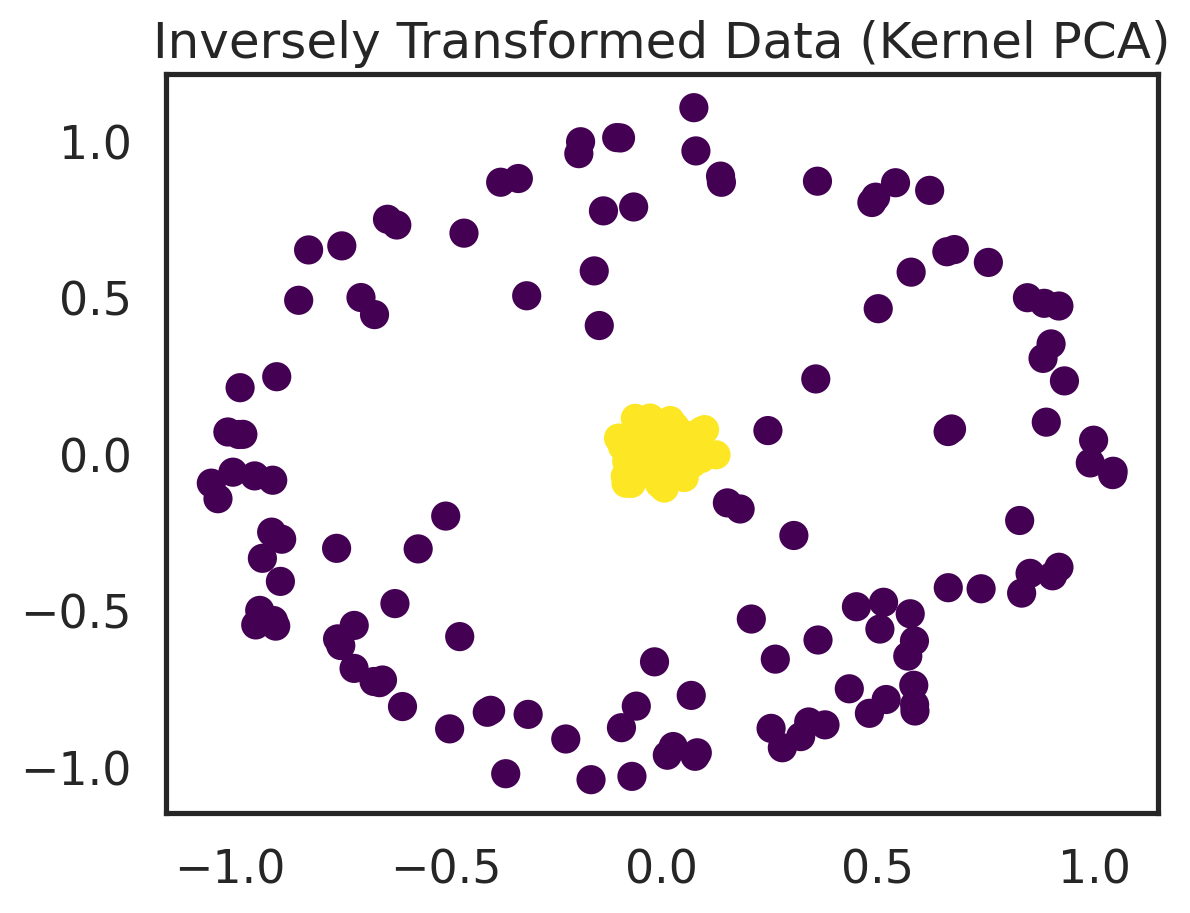

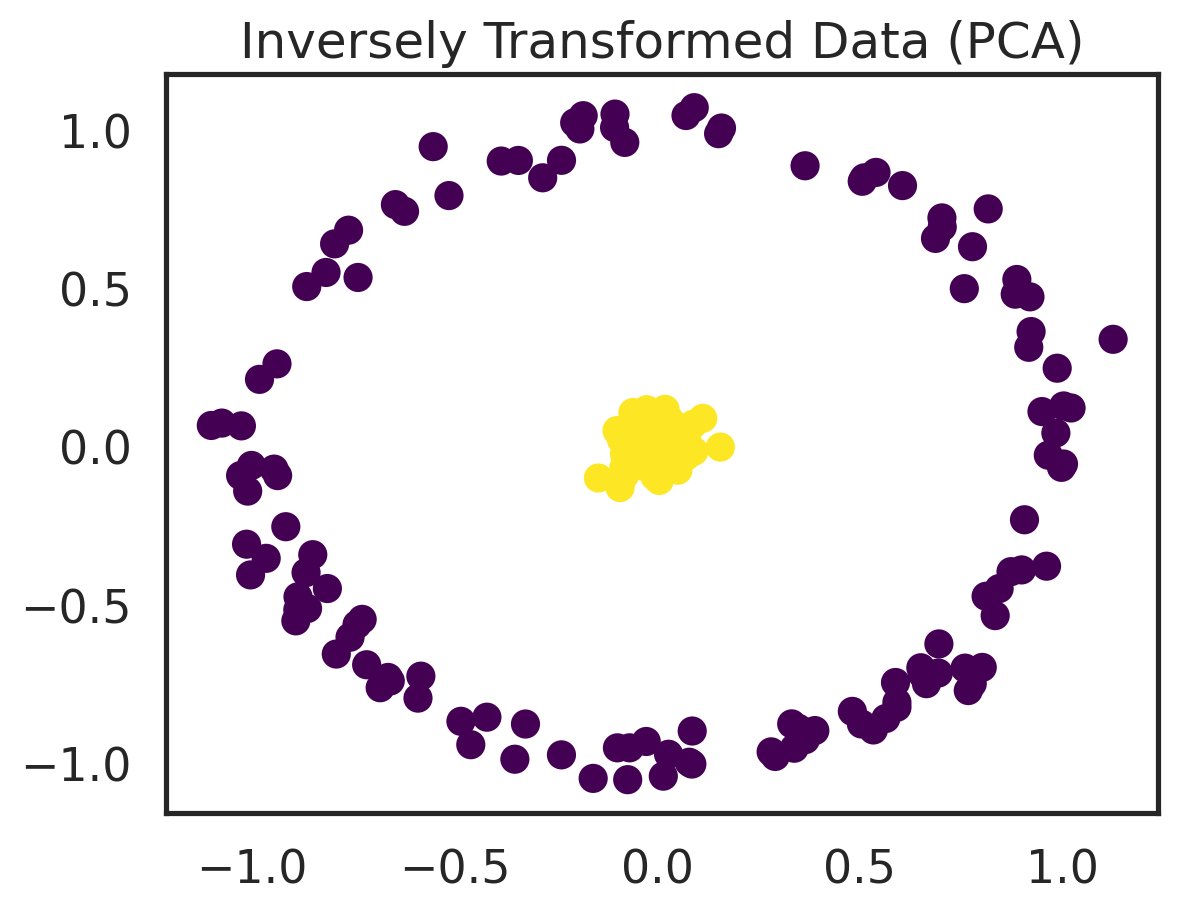

In [ ]:
plt.scatter(X_test[:,0],X_test[:,1] ,c=y_test,cmap='viridis')
plt.title("Original data")
plt.show()

plt.scatter(X_hat_kpca[:,0],X_hat_kpca[:,1] ,c=y_test,cmap='viridis')
plt.title("Inversely Transformed Data (Kernel PCA)")
plt.show()

plt.scatter(X_hat_pca[:,0],X_hat_pca[:,1] ,c=y_test,cmap='viridis')
plt.title("Inversely Transformed Data (PCA)")
plt.show()

In [ ]:
print("Mean squared error for Kernel PCA is:",((X_test-X_hat_kpca)**2).mean())

Mean squared error for Kernel PCA is: 0.011275231727641355


In [ ]:
print("Mean squared error PCA is:" ,((X_test-X_hat_pca)**2).mean())

Mean squared error PCA is: 1.4617528040045885e-33


In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
kernel_pca = KernelPCA(kernel="rbf" ,fit_inverse_transform=True, alpha=0.1)
kernel_score=kernel_pca.fit_transform(data)